# Data pre-processing

In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import glob
import os
import numpy as np

In [2]:
import pickle

# variable pre-processed in featues_save.py
with open('input_features_labels.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    X,y = pickle.load(f)

In [3]:
#Split the data into training set (70%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
del X,y

In [4]:
# unique value counts for numpy array

unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 20203]
 [    1 20239]
 [    2 20245]
 [    3 20260]]


In [5]:
# unique value counts for numpy array

unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5093]
 [   1 5057]
 [   2 5051]
 [   3 5036]]


# Pytorch

## Dataset to pytorch

In [6]:
#pytorch related libraries

import torch
print(torch.__version__)

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()


#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

from torch.utils.data import Dataset
from torchvision import models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm.notebook import tqdm


2.1.1
Using device: cuda

NVIDIA GeForce RTX 3090 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [7]:
class brain_dataset(Dataset):

    def __init__(self, instance_list, label_list):
        self.instance_list = instance_list
        self.instance_label = label_list
           
    def __getitem__(self, index):
        return self.instance_list[index], self.instance_label[index]
    
    def __len__(self):
        return len(self.instance_list)
    
    def __get_instance_label__(self):
        return self.instance_label
    
    def __get_instance_list__(self):
        return np.array(self.instance_list).shape

In [8]:
train_dataset = brain_dataset(X_train, y_train)
test_dataset = brain_dataset(X_test, y_test)

In [9]:
#dataset size
print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")


Train dataset size: 80947
Test dataset size: 20237


In [10]:
import random

print("Training samples")
#Get 5 random sample train indexes
random_samples_idx = random.sample(range(len(train_dataset)), k=5)

# Loop through samples and display random samples 
for i, targ_sample in enumerate(random_samples_idx):
    feature, label = train_dataset[targ_sample][0], train_dataset[targ_sample][1]
    
    print(f"Feature {i} = {feature}")
    print(f"Label {i} = {label}")

print("\n")
print("Test samples")
#Get 5 random sample train indexes
random_samples_idx = random.sample(range(len(test_dataset)), k=5)

# Loop through samples and display random samples 
for i, targ_sample in enumerate(random_samples_idx):
    feature, label = train_dataset[targ_sample][0], train_dataset[targ_sample][1]
    
    print(f"Feature {i} = {feature}")
    print(f"Label {i} = {label}")

Training samples
Feature 0 = [[ 0.20598377  1.2904344  -0.03600855 ... -0.01338417 -0.11349685
   0.01357831]
 [ 0.21302529  1.2086023  -0.03742157 ...  0.15125377 -0.1211915
  -0.04122345]
 [ 0.22142108  1.1195688  -0.04015938 ...  0.30466104 -0.12703091
  -0.09670651]
 ...
 [ 0.367812   -0.00241334 -0.18788026 ... -0.13658474 -0.11352323
  -0.49564606]
 [ 0.37029374 -0.07281548 -0.18959628 ... -0.0900624  -0.1035921
  -0.5209655 ]
 [ 0.3717544  -0.1331075  -0.18981612 ... -0.02990637 -0.09251638
  -0.5428204 ]]
Label 0 = 2
Feature 1 = [[ 0.6216991  -1.5476356  -0.16026413 ... -0.72566783 -0.15501618
   0.47302845]
 [ 0.62002784 -1.5736979  -0.15217339 ... -0.83375597 -0.15036252
   0.42524478]
 [ 0.6182118  -1.5927321  -0.14538668 ... -0.8979597  -0.14928754
   0.36246073]
 ...
 [ 1.1388952   1.3861403  -0.15498495 ...  1.7378873  -0.3386734
  -0.21853358]
 [ 1.1468635   1.4925703  -0.16141194 ...  1.8124343  -0.34316745
  -0.24651591]
 [ 1.1483794   1.5681931  -0.16773765 ...  1.804

In [11]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=1024, 
                                           shuffle=True)


test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=1024, 
                                           shuffle=True)

In [12]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([1024, 150, 8]), torch.Size([1024]))

In [ ]:

# folder 1 model
'''
class SimpleCNNModel(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(SimpleCNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * (input_size // 4), 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x.permute(0, 2, 1))  # Adjust the input for Conv1d
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

# Assuming input_size = 150, input_channels = 8, and num_classes = 10
input_channels = 8
input_size = 150
num_classes = 4

# Instantiate the ResNet-18 model
model = SimpleCNNModel(input_channels=input_channels, num_classes=num_classes).to(device)

# Print the modified ResNet-18 architecture
print(model)
'''

In [4]:
# folder 2 model

class SimpleCNNLSTMModel(nn.Module):
    def __init__(self, input_channels, input_size, num_classes, hidden_size=64, num_layers=2):
        super(SimpleCNNLSTMModel, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()32
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        cnn_output_size = 32 * (input_size // 4)

        # LSTM layers
        self.lstm1 = nn.LSTM(input_size=cnn_output_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x.permute(0, 2, 1))  # Adjust the input for Conv1d
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)

        # Reshape for LSTM input
        x = x.view(x.size(0), 1, -1)

        # First LSTM layer
        x, _ = self.lstm1(x)

        # Second LSTM layer
        x, _ = self.lstm2(x)

        # Only take the output from the final time step
        x = x[:, -1, :]

        # Fully connected layers
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

# Assuming input_size = 150, input_channels = 8, and num_classes = 4
input_channels = 8
input_size = 150
num_classes = 4

# Instantiate the SimpleCNNLSTMModel
model = SimpleCNNLSTMModel(input_channels=input_channels, input_size=input_size, num_classes=num_classes).to(device)
model


SimpleCNNLSTMModel(
  (conv1): Conv1d(8, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu2): ReLU()
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lstm1): LSTM(1184, 64, num_layers=2, batch_first=True)
  (lstm2): LSTM(64, 64, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [16]:
#tensorboard import

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("saved_model/runs")

full_path = os.path.join("saved_model", "best_accuracy_save")

# Check if the folder exists
if not os.path.exists(full_path):
    # If not, create the folder
    os.makedirs(full_path)

In [17]:
#training engine in progress
#https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 1000
train_accs = []
test_accs = []
train_losss = []
test_losss = []


for epoch in range(epochs):
    
    train_loss = 0
    train_acc = 0
    loop = tqdm(enumerate (train_loader), total=len(train_loader), leave=True)
    for i, data in loop:
        features, labels = data
        
        #model in train mod
        model.train()
        
        #data to device
        X = features.to(device)
        y = labels.to(device)
        
        # 1- forward pass
        y_pred = model(X)

        # 2- calculate the traning loss 
        loss = loss_fn(y_pred, y)
        
        # acculmulate all the  loss by adding all the loss of epoch in each batch it is later averaged on the length of dataloder to show the average epoch loss
        train_loss += loss.item() 
        
        # 3- optimizer zero grad
        optimizer.zero_grad()
        
        # 4- backward propagation        
        loss.backward()
        
        # 5- update weights
        optimizer.step()
        
        # Softmax layer of output if there is some other model
        _, y_pred_class = torch.max(y_pred.data, 1)
        
        # acculmulate all the acc by adding all the acc of epoch which is then averaged on the length of dataloder to show the average acc
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        
        loop.set_description(f"Epoch {epoch}/{epochs-1}")
        loop.set_postfix(train_acc = (y_pred_class == y).sum().item()/len(y_pred), train_loss = loss.item())
        
    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(train_loader)
    train_acc = train_acc / len(train_loader)
        
    # code for testing data
    
    # Put model in eval mode
    model.eval() 

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(test_loader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(test_loader)
    test_acc = test_acc / len(test_loader)
    
    print('epoch: {}, train_acc: {} , train_loss: {} , test_acc: {} , test_loss: {}'.format(epoch, train_acc, train_loss, test_acc, test_loss))
    
    #indvidual graphs remove comment if individual graph is needed
    #writer.add_scalar("Training accuracy", train_acc,epoch)
    #writer.add_scalar("Training loss", train_loss,epoch)
    #writer.add_scalar("Test accuracy", test_acc,epoch)
    #writer.add_scalar("Test loss", test_loss,epoch)
    
    
    #combined graphs but make sure to uncheck ignore outliers checkbox in tensorboard 
    writer.add_scalars("Training and test accuracy", {"train_acc" : train_acc, "test_acc" : test_acc},epoch)
    writer.add_scalars("Training and test loss", {"train_loss" : train_loss, "test_loss" : test_loss},epoch)
        
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    train_losss.append(train_loss)
    test_losss.append(test_loss)
    
    #codition to check if the model has best accuracy or the minimum loss
    if (test_acc >= max(test_accs) or test_loss <= min(test_losss)):
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss_fn,
            }, "saved_model/best_accuracy_save/epoch_{}_tacc{:.4f}_tloss_{:.2f}.pth".format(epoch, test_acc,test_loss))
        

  0%|          | 0/80 [00:00<?, ?it/s]

/home/mehshan/anaconda3/envs/tor/lib/python3.11/site-packages/torch/nn/modules/conv.py:306: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1699449183005/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv1d(input, weight, bias, self.stride,


epoch: 0, train_acc: 0.3330578373927696 , train_loss: 1.3246321514248849 , test_acc: 0.3731232119278169 , test_loss: 1.2706726789474487


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 1, train_acc: 0.4013535443474264 , train_loss: 1.2298092916607857 , test_acc: 0.4366063390284891 , test_loss: 1.2180268824100495


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 2, train_acc: 0.4752362419577206 , train_loss: 1.1238317653536796 , test_acc: 0.4789632057258323 , test_loss: 1.144888836145401


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 3, train_acc: 0.5519902248008578 , train_loss: 0.9889898128807545 , test_acc: 0.565913154709507 , test_loss: 0.9750784724950791


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 4, train_acc: 0.6199300130208333 , train_loss: 0.8742158800363541 , test_acc: 0.6020232099271767 , test_loss: 0.9231825113296509


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 5, train_acc: 0.7077794692095588 , train_loss: 0.7008047223091125 , test_acc: 0.740744100612196 , test_loss: 0.6402156800031662


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 6, train_acc: 0.811904488357843 , train_loss: 0.4847976803779602 , test_acc: 0.8007311089548657 , test_loss: 0.5347856491804123


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 7, train_acc: 0.8912662281709558 , train_loss: 0.29816307313740253 , test_acc: 0.8065644756322022 , test_loss: 0.5804366409778595


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 8, train_acc: 0.9103486902573529 , train_loss: 0.2565152160823345 , test_acc: 0.9161337878121 , test_loss: 0.23130928725004196


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 9, train_acc: 0.9623403511795343 , train_loss: 0.10875675519928336 , test_acc: 0.970052041653329 , test_loss: 0.08944905921816826


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 10, train_acc: 0.9813589058670343 , train_loss: 0.055575835332274434 , test_acc: 0.9727007017245519 , test_loss: 0.08358349185436964


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 11, train_acc: 0.97557373046875 , train_loss: 0.07242267764522695 , test_acc: 0.984418388884443 , test_loss: 0.04346510451287031


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 12, train_acc: 0.99429931640625 , train_loss: 0.018745958698127653 , test_acc: 0.9913823673575545 , test_loss: 0.026335173379629852


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 13, train_acc: 0.99305419921875 , train_loss: 0.021502082369988785 , test_acc: 0.9798046624919975 , test_loss: 0.06231642737984657


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 14, train_acc: 0.98853759765625 , train_loss: 0.035749900835799056 , test_acc: 0.985105233674776 , test_loss: 0.045505336951464415


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 15, train_acc: 0.99290771484375 , train_loss: 0.021595905606045563 , test_acc: 0.9944097111075545 , test_loss: 0.018279296904802324


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 16, train_acc: 0.99774169921875 , train_loss: 0.007639413193101063 , test_acc: 0.9938085812459987 , test_loss: 0.020515277795493603


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 17, train_acc: 0.9850210152420343 , train_loss: 0.04610219113528728 , test_acc: 0.9332865892085467 , test_loss: 0.20270569920539855


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 18, train_acc: 0.98824462890625 , train_loss: 0.036135735997231674 , test_acc: 0.9958528604153329 , test_loss: 0.012422842008527368


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 19, train_acc: 0.99940185546875 , train_loss: 0.002474241743220773 , test_acc: 0.9975434013884443 , test_loss: 0.007983450242318214


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 20, train_acc: 0.99769287109375 , train_loss: 0.00777186688465008 , test_acc: 0.9960633652768885 , test_loss: 0.011226918059401214


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 21, train_acc: 0.999462890625 , train_loss: 0.0019221455680963118 , test_acc: 0.998779296875 , test_loss: 0.004106435584253632


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 22, train_acc: 0.99989013671875 , train_loss: 0.00042962242418980167 , test_acc: 0.9990082451384443 , test_loss: 0.003344783777720295


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 23, train_acc: 0.99991455078125 , train_loss: 0.00027338974686017534 , test_acc: 0.9989105888884444 , test_loss: 0.0036365008156280963


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 24, train_acc: 0.99989013671875 , train_loss: 0.00034720499852483047 , test_acc: 0.99912109375 , test_loss: 0.003413562233617995


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 25, train_acc: 0.99991455078125 , train_loss: 0.00023194909200583425 , test_acc: 0.9989594170134444 , test_loss: 0.0035182088122382993


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 26, train_acc: 0.99923095703125 , train_loss: 0.002290654724538399 , test_acc: 0.9935915743037771 , test_loss: 0.0239582440815866


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 27, train_acc: 0.49237563189338235 , train_loss: 1.5490776047023247 , test_acc: 0.37601601262403966 , test_loss: 1.298337471485138


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 28, train_acc: 0.3932207892922794 , train_loss: 1.2649349361658095 , test_acc: 0.3800362365957106 , test_loss: 1.2806615829467773


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 29, train_acc: 0.4235392252604167 , train_loss: 1.2143618896603585 , test_acc: 0.45250373869638283 , test_loss: 1.1734227061271667


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 30, train_acc: 0.46823586856617644 , train_loss: 1.1399274751544 , test_acc: 0.4588709637083867 , test_loss: 1.2026479303836823


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 31, train_acc: 0.5188163009344363 , train_loss: 1.0566436059772968 , test_acc: 0.5370817411571702 , test_loss: 1.0214788407087325


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 32, train_acc: 0.5860272575827206 , train_loss: 0.9367250151932239 , test_acc: 0.6048227307738476 , test_loss: 0.8800794243812561


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 33, train_acc: 0.6552741555606618 , train_loss: 0.8084449797868729 , test_acc: 0.6760934123919654 , test_loss: 0.7591781258583069


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 34, train_acc: 0.7278214996936274 , train_loss: 0.6590998034924269 , test_acc: 0.6627871543894046 , test_loss: 0.8595581918954849


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 35, train_acc: 0.7785070082720588 , train_loss: 0.5538390569388867 , test_acc: 0.7879077554817542 , test_loss: 0.5272477686405181


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 36, train_acc: 0.8503200157015931 , train_loss: 0.39225518740713594 , test_acc: 0.7200669839348592 , test_loss: 0.7944857120513916


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 37, train_acc: 0.8812969132965686 , train_loss: 0.32050116788595917 , test_acc: 0.8848544659290972 , test_loss: 0.3023919194936752


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 38, train_acc: 0.94188232421875 , train_loss: 0.16791195711120963 , test_acc: 0.9298187294934379 , test_loss: 0.19010618031024934


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 39, train_acc: 0.9506036496629902 , train_loss: 0.1447609854862094 , test_acc: 0.8064212422975352 , test_loss: 0.7439400464296341


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 40, train_acc: 0.9035146675857844 , train_loss: 0.293864406272769 , test_acc: 0.952864541653329 , test_loss: 0.12874726466834546


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 41, train_acc: 0.9664409562653186 , train_loss: 0.1026423763949424 , test_acc: 0.9723643440901089 , test_loss: 0.07948386184871196


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 42, train_acc: 0.9872774011948529 , train_loss: 0.03757843556813896 , test_acc: 0.9807595305497759 , test_loss: 0.05496016703546047


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 43, train_acc: 0.9881093941482844 , train_loss: 0.032636722829192874 , test_acc: 0.9753580520766645 , test_loss: 0.06679361276328563


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 44, train_acc: 0.9857534371170343 , train_loss: 0.03929862342774868 , test_acc: 0.9815103958266646 , test_loss: 0.05107487197965384


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 45, train_acc: 0.9764892578125 , train_loss: 0.06947041708044707 , test_acc: 0.9710524867957746 , test_loss: 0.10488374680280685


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 46, train_acc: 0.9851318359375 , train_loss: 0.042826772667467594 , test_acc: 0.9847330520766645 , test_loss: 0.04273745361715555


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 47, train_acc: 0.9919189453125 , train_loss: 0.02009499544510618 , test_acc: 0.9892827579825545 , test_loss: 0.026957039907574653


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 48, train_acc: 0.9859599992340685 , train_loss: 0.03645900365663692 , test_acc: 0.9326268781009922 , test_loss: 0.24030417948961258


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 49, train_acc: 0.97581787109375 , train_loss: 0.06918664199765771 , test_acc: 0.9852853538132201 , test_loss: 0.03977911351248622


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 50, train_acc: 0.9908071480545344 , train_loss: 0.022167039930354803 , test_acc: 0.9891482149287771 , test_loss: 0.028835206059738994


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 51, train_acc: 0.99166259765625 , train_loss: 0.01885270521743223 , test_acc: 0.9894596270806659 , test_loss: 0.024807719653472303


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 52, train_acc: 0.9833251953125 , train_loss: 0.049319991981610654 , test_acc: 0.9713237611035531 , test_loss: 0.08050075750797987


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 53, train_acc: 0.969384765625 , train_loss: 0.09088598452508449 , test_acc: 0.9573816746358835 , test_loss: 0.11804905571043492


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 54, train_acc: 0.9891591988357844 , train_loss: 0.02865274394862354 , test_acc: 0.9896549395806659 , test_loss: 0.025511102937161922


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 55, train_acc: 0.9923574410232844 , train_loss: 0.0174305634573102 , test_acc: 0.98954209096911 , test_loss: 0.02432597102597356


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 56, train_acc: 0.992724609375 , train_loss: 0.016266937274485825 , test_acc: 0.9897981729153329 , test_loss: 0.023076268611475825


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 57, train_acc: 0.9924795113357844 , train_loss: 0.015774084033910184 , test_acc: 0.9910525118037772 , test_loss: 0.020289538986980916


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 58, train_acc: 0.9928335152420343 , train_loss: 0.014741823624353856 , test_acc: 0.9903450354113316 , test_loss: 0.022545107081532477


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 59, train_acc: 0.99288330078125 , train_loss: 0.014971150774726993 , test_acc: 0.9897927336747759 , test_loss: 0.0252197758294642


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 60, train_acc: 0.99014892578125 , train_loss: 0.023726737749530002 , test_acc: 0.979734139924776 , test_loss: 0.05029023326933384


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 61, train_acc: 0.9833984375 , train_loss: 0.04393684447277337 , test_acc: 0.9754622104073304 , test_loss: 0.06735709197819233


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 62, train_acc: 0.9862905464920344 , train_loss: 0.03677559555508196 , test_acc: 0.9438996728953265 , test_loss: 0.19361601173877716


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 63, train_acc: 0.9775381050857843 , train_loss: 0.06751929695019498 , test_acc: 0.9823404739516646 , test_loss: 0.0632622592151165


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 64, train_acc: 0.991455078125 , train_loss: 0.022755047102691606 , test_acc: 0.9905490381922215 , test_loss: 0.02173532322049141


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 65, train_acc: 0.9932241402420343 , train_loss: 0.014803941978607326 , test_acc: 0.9914615802056659 , test_loss: 0.01862691333517432


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 66, train_acc: 0.9929931640625 , train_loss: 0.015231228867196477 , test_acc: 0.9909396631922215 , test_loss: 0.01936768856830895


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 67, train_acc: 0.99344482421875 , train_loss: 0.013749750684019091 , test_acc: 0.9916905284691101 , test_loss: 0.019611946307122707


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 68, train_acc: 0.993701171875 , train_loss: 0.013255009511340177 , test_acc: 0.9920995968709987 , test_loss: 0.017915720539167523


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 69, train_acc: 0.99410400390625 , train_loss: 0.012645942324525095 , test_acc: 0.9919802461787771 , test_loss: 0.018114869110286237


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 70, train_acc: 0.993505859375 , train_loss: 0.016081500781001522 , test_acc: 0.985834404509443 , test_loss: 0.042700123973190784


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 71, train_acc: 0.9680654488357844 , train_loss: 0.09426972933579236 , test_acc: 0.9417544864356595 , test_loss: 0.16270314976572992


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 72, train_acc: 0.9820302925857843 , train_loss: 0.053287773532792924 , test_acc: 0.9905067121478874 , test_loss: 0.030120041407644748


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 73, train_acc: 0.99566650390625 , train_loss: 0.010662879541814618 , test_acc: 0.993362626040333 , test_loss: 0.015844810265116395


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 74, train_acc: 0.996240234375 , train_loss: 0.009905198073829525 , test_acc: 0.9828135628401089 , test_loss: 0.051650854293257


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 75, train_acc: 0.9947021484375 , train_loss: 0.014665424142003758 , test_acc: 0.9926822833306659 , test_loss: 0.019839520612731577


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 76, train_acc: 0.9972900390625 , train_loss: 0.007202096594846807 , test_acc: 0.9957552041653329 , test_loss: 0.012163727660663426


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 77, train_acc: 0.9973876953125 , train_loss: 0.006810553459217772 , test_acc: 0.9953645791653329 , test_loss: 0.012955209845677019


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 78, train_acc: 0.99710693359375 , train_loss: 0.0071831570741323954 , test_acc: 0.9960297295134444 , test_loss: 0.011466888687573373


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 79, train_acc: 0.99833984375 , train_loss: 0.0048493696995137725 , test_acc: 0.9955750840268885 , test_loss: 0.011337568413000553


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 80, train_acc: 0.99844970703125 , train_loss: 0.004220228192571085 , test_acc: 0.9956087197903329 , test_loss: 0.01136289497371763


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 81, train_acc: 0.8100557215073529 , train_loss: 0.5401433274731972 , test_acc: 0.9376008447703266 , test_loss: 0.17259373068809508


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 82, train_acc: 0.9836181640625 , train_loss: 0.04635735433548689 , test_acc: 0.9881933468709987 , test_loss: 0.03539349092170596


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 83, train_acc: 0.9938720703125 , train_loss: 0.018670129965175874 , test_acc: 0.9942599756922215 , test_loss: 0.019824316212907433


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 84, train_acc: 0.9981689453125 , train_loss: 0.006861139236025338 , test_acc: 0.9953461357634443 , test_loss: 0.013554563547950238


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 85, train_acc: 0.99681396484375 , train_loss: 0.010723436667467468 , test_acc: 0.9763042298535531 , test_loss: 0.0776601143181324


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 86, train_acc: 0.995703125 , train_loss: 0.014286196575267241 , test_acc: 0.9919650538172216 , test_loss: 0.023116934578865767


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 87, train_acc: 0.99517822265625 , train_loss: 0.015296493434289005 , test_acc: 0.9898686954825544 , test_loss: 0.03246572175994515


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 88, train_acc: 0.99736328125 , train_loss: 0.0089800200323225 , test_acc: 0.9887792843709986 , test_loss: 0.03923424892127514


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 89, train_acc: 0.99481201171875 , train_loss: 0.01807800760725513 , test_acc: 0.9946169649287772 , test_loss: 0.0166166580747813


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 90, train_acc: 0.99735107421875 , train_loss: 0.009650872345082462 , test_acc: 0.9829567961747759 , test_loss: 0.053439713828265664


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 91, train_acc: 0.99161376953125 , train_loss: 0.02768562282435596 , test_acc: 0.99017685659411 , test_loss: 0.030023687053471804


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 92, train_acc: 0.99888916015625 , train_loss: 0.004230050028854748 , test_acc: 0.9954134072903329 , test_loss: 0.014610042935237289


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 93, train_acc: 0.9960683785232843 , train_loss: 0.01385679772865842 , test_acc: 0.9779155579785531 , test_loss: 0.07855739463120699


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 94, train_acc: 0.9885000191482843 , train_loss: 0.04025496103568003 , test_acc: 0.9940006427056659 , test_loss: 0.020034480933099987


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 95, train_acc: 0.9982177734375 , train_loss: 0.005922332322370494 , test_acc: 0.9967654024287771 , test_loss: 0.010316721338313073


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 96, train_acc: 0.9990966796875 , train_loss: 0.0037574979211058234 , test_acc: 0.9959841524287771 , test_loss: 0.012253104435512797


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 97, train_acc: 0.99986572265625 , train_loss: 0.0009416552616130502 , test_acc: 0.9958344170134443 , test_loss: 0.020886062085628508


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 98, train_acc: 0.99886474609375 , train_loss: 0.005336165809058002 , test_acc: 0.997415360415333 , test_loss: 0.008808433293597772


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 99, train_acc: 0.999755859375 , train_loss: 0.0008593452283093938 , test_acc: 0.9977387138884444 , test_loss: 0.00795098083326593


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 100, train_acc: 0.99989013671875 , train_loss: 0.0007643622381692694 , test_acc: 0.9982269951384444 , test_loss: 0.005688345374073834


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 101, train_acc: 0.9993642769607843 , train_loss: 0.009918126607635714 , test_acc: 0.99365234375 , test_loss: 0.0261110947933048


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 102, train_acc: 0.9435546875 , train_loss: 0.18879178374772893 , test_acc: 0.9600824138724391 , test_loss: 0.1419328823685646


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 103, train_acc: 0.9904165230545343 , train_loss: 0.0290829747042153 , test_acc: 0.9887912256922216 , test_loss: 0.03398106377571821


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 104, train_acc: 0.99398193359375 , train_loss: 0.02076883738482138 , test_acc: 0.9920323253441101 , test_loss: 0.023543890612199903


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 105, train_acc: 0.9910888671875 , train_loss: 0.029490593394439202 , test_acc: 0.9931825059018886 , test_loss: 0.022663909010589123


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 106, train_acc: 0.9983144722732844 , train_loss: 0.006434194349276367 , test_acc: 0.9968934434018886 , test_loss: 0.00989047553157434


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 107, train_acc: 0.99537353515625 , train_loss: 0.0158730672323145 , test_acc: 0.9938053302056659 , test_loss: 0.019220667704939843


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 108, train_acc: 0.99879150390625 , train_loss: 0.00433295227248891 , test_acc: 0.9968966944422215 , test_loss: 0.010294368769973517


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 109, train_acc: 0.99949951171875 , train_loss: 0.002077725390699925 , test_acc: 0.998388671875 , test_loss: 0.00559184315497987


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 110, train_acc: 0.99986572265625 , train_loss: 0.0006918577676515269 , test_acc: 0.9988617607634444 , test_loss: 0.00419015311927069


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 111, train_acc: 1.0 , train_loss: 0.0002474138663274061 , test_acc: 0.998876953125 , test_loss: 0.003977099941403139


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 112, train_acc: 1.0 , train_loss: 0.00014205374636730995 , test_acc: 0.998828125 , test_loss: 0.004262235565693118


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 113, train_acc: 0.99989013671875 , train_loss: 0.0003463032755007589 , test_acc: 0.999072265625 , test_loss: 0.003845832927618176


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 114, train_acc: 0.9999755859375 , train_loss: 0.00013127158136683192 , test_acc: 0.9990234375 , test_loss: 0.0040116267147823235


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 115, train_acc: 0.99993896484375 , train_loss: 0.00015927794515846472 , test_acc: 0.9990570732634444 , test_loss: 0.0038079845791799015


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 116, train_acc: 1.0 , train_loss: 4.061091891287561e-05 , test_acc: 0.9989105888884444 , test_loss: 0.00396324601242668


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 117, train_acc: 1.0 , train_loss: 2.70577584046805e-05 , test_acc: 0.998880204165333 , test_loss: 0.004245350813653204


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 118, train_acc: 1.0 , train_loss: 2.0709942810981373e-05 , test_acc: 0.998974609375 , test_loss: 0.00396723615413066


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 119, train_acc: 1.0 , train_loss: 1.6939907834512268e-05 , test_acc: 0.998977860415333 , test_loss: 0.004247575667068304


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 120, train_acc: 1.0 , train_loss: 1.4059635338981024e-05 , test_acc: 0.9989105888884444 , test_loss: 0.004082832014319138


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 121, train_acc: 1.0 , train_loss: 1.1954389040624847e-05 , test_acc: 0.998828125 , test_loss: 0.004057456751252175


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 122, train_acc: 1.0 , train_loss: 1.0176849394660792e-05 , test_acc: 0.998876953125 , test_loss: 0.0040696374424442185


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 123, train_acc: 1.0 , train_loss: 8.646751822993792e-06 , test_acc: 0.998876953125 , test_loss: 0.004224269895166799


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 124, train_acc: 1.0 , train_loss: 7.5251545041510324e-06 , test_acc: 0.998828125 , test_loss: 0.004178727430553408


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 125, train_acc: 1.0 , train_loss: 6.611797935818231e-06 , test_acc: 0.9989105888884444 , test_loss: 0.004219039679173875


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 126, train_acc: 1.0 , train_loss: 5.654993735326741e-06 , test_acc: 0.9988617607634444 , test_loss: 0.004248205735711963


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 127, train_acc: 1.0 , train_loss: 5.0414268555343256e-06 , test_acc: 0.998876953125 , test_loss: 0.004246256692204043


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 128, train_acc: 1.0 , train_loss: 4.5905173976734656e-06 , test_acc: 0.9988465684018886 , test_loss: 0.004414255295068869


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 129, train_acc: 1.0 , train_loss: 4.145857943882447e-06 , test_acc: 0.9988617607634444 , test_loss: 0.004368696275014372


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 130, train_acc: 1.0 , train_loss: 3.684588853047899e-06 , test_acc: 0.998876953125 , test_loss: 0.004463849535386544


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 131, train_acc: 1.0 , train_loss: 3.3556730166139916e-06 , test_acc: 0.9988617607634444 , test_loss: 0.0046040739478485195


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 132, train_acc: 1.0 , train_loss: 3.0414329348360525e-06 , test_acc: 0.998876953125 , test_loss: 0.004441714964559651


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 133, train_acc: 1.0 , train_loss: 2.8306552607659797e-06 , test_acc: 0.9988465684018886 , test_loss: 0.0046619742158327425


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 134, train_acc: 1.0 , train_loss: 2.5864750206494593e-06 , test_acc: 0.9988617607634444 , test_loss: 0.004512606506614248


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 135, train_acc: 1.0 , train_loss: 2.3885270515222603e-06 , test_acc: 0.99892578125 , test_loss: 0.0044779054986065605


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 136, train_acc: 1.0 , train_loss: 2.2718541753619093e-06 , test_acc: 0.9989105888884444 , test_loss: 0.004587235928465816


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 137, train_acc: 1.0 , train_loss: 2.030565473276624e-06 , test_acc: 0.9988465684018886 , test_loss: 0.0047771466977792445


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 138, train_acc: 1.0 , train_loss: 1.8585548595240198e-06 , test_acc: 0.9989105888884444 , test_loss: 0.004660981003689812


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 139, train_acc: 1.0 , train_loss: 1.7326782202786716e-06 , test_acc: 0.998876953125 , test_loss: 0.004609711591183441


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 140, train_acc: 1.0 , train_loss: 1.597867715830148e-06 , test_acc: 0.998876953125 , test_loss: 0.004626200376014822


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 141, train_acc: 1.0 , train_loss: 1.485748228446937e-06 , test_acc: 0.9988953965268885 , test_loss: 0.004731009151646504


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 142, train_acc: 1.0 , train_loss: 1.3434074316087673e-06 , test_acc: 0.9988313760403329 , test_loss: 0.0047580705345353635


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 143, train_acc: 1.0 , train_loss: 1.2480315790597273e-06 , test_acc: 0.99892578125 , test_loss: 0.004635191429770202


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 144, train_acc: 1.0 , train_loss: 1.1685945256800777e-06 , test_acc: 0.998876953125 , test_loss: 0.0046628983396658445


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 145, train_acc: 1.0 , train_loss: 1.0726828334917115e-06 , test_acc: 0.9988465684018886 , test_loss: 0.004755059614399215


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 146, train_acc: 1.0 , train_loss: 1.0066481424431117e-06 , test_acc: 0.998876953125 , test_loss: 0.004714493261235475


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 147, train_acc: 1.0 , train_loss: 9.437276975887698e-07 , test_acc: 0.9988617607634444 , test_loss: 0.004715852677691146


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 148, train_acc: 1.0 , train_loss: 8.943083614099123e-07 , test_acc: 0.9988498194422215 , test_loss: 0.004991016742496868


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 149, train_acc: 1.0 , train_loss: 8.1749687605992e-07 , test_acc: 0.99892578125 , test_loss: 0.004693136030391542


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 150, train_acc: 1.0 , train_loss: 7.776140980908508e-07 , test_acc: 0.9988465684018886 , test_loss: 0.004818934359809646


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 151, train_acc: 1.0 , train_loss: 7.069932706826876e-07 , test_acc: 0.998974609375 , test_loss: 0.00468128695483756


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 152, train_acc: 1.0 , train_loss: 6.589913777332867e-07 , test_acc: 0.9989930527768885 , test_loss: 0.0047606945976440326


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 153, train_acc: 1.0 , train_loss: 6.183566838124932e-07 , test_acc: 0.998876953125 , test_loss: 0.004846636390857384


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 154, train_acc: 1.0 , train_loss: 5.761543731441776e-07 , test_acc: 0.998876953125 , test_loss: 0.004877691132060135


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 155, train_acc: 1.0 , train_loss: 5.403693887906513e-07 , test_acc: 0.9989594170134444 , test_loss: 0.004752210709921201


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 156, train_acc: 1.0 , train_loss: 5.101943031160516e-07 , test_acc: 0.9989594170134444 , test_loss: 0.00502342333852539


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 157, train_acc: 1.0 , train_loss: 4.937086828249448e-07 , test_acc: 0.9988617607634444 , test_loss: 0.00487440201723075


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 158, train_acc: 1.0 , train_loss: 4.578404692701099e-07 , test_acc: 0.9988617607634444 , test_loss: 0.004889033583094715


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 159, train_acc: 1.0 , train_loss: 4.4103047622812144e-07 , test_acc: 0.9988465684018886 , test_loss: 0.004915076876704916


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 160, train_acc: 1.0 , train_loss: 4.0784970156693134e-07 , test_acc: 0.998876953125 , test_loss: 0.004861827867125612


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 161, train_acc: 1.0 , train_loss: 3.8311336902907556e-07 , test_acc: 0.9988465684018886 , test_loss: 0.004895584607220371


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 162, train_acc: 1.0 , train_loss: 3.5840999164094e-07 , test_acc: 0.9988617607634444 , test_loss: 0.004853697095131793


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 163, train_acc: 1.0 , train_loss: 3.403277018421136e-07 , test_acc: 0.9988617607634444 , test_loss: 0.004863759360796393


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 164, train_acc: 1.0 , train_loss: 3.2085509700241487e-07 , test_acc: 0.9988617607634444 , test_loss: 0.004881539299663018


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 165, train_acc: 1.0 , train_loss: 3.0615803838784925e-07 , test_acc: 0.9988465684018886 , test_loss: 0.004956129692254762


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 166, train_acc: 1.0 , train_loss: 2.8831728973166546e-07 , test_acc: 0.998828125 , test_loss: 0.004813095852023252


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 167, train_acc: 1.0 , train_loss: 2.7425454764973265e-07 , test_acc: 0.998876953125 , test_loss: 0.00485313461063015


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 168, train_acc: 1.0 , train_loss: 2.6043357621574613e-07 , test_acc: 0.998876953125 , test_loss: 0.004895195918106765


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 169, train_acc: 1.0 , train_loss: 2.4584903579594197e-07 , test_acc: 0.9989105888884444 , test_loss: 0.004914816951350076


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 170, train_acc: 1.0 , train_loss: 2.3750620288254253e-07 , test_acc: 0.99892578125 , test_loss: 0.004866382424756921


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 171, train_acc: 1.0 , train_loss: 2.1944311909827263e-07 , test_acc: 0.99892578125 , test_loss: 0.004988440591841936


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 172, train_acc: 1.0 , train_loss: 2.0885923421865015e-07 , test_acc: 0.99892578125 , test_loss: 0.0049936368189491985


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 173, train_acc: 1.0 , train_loss: 1.9805215978330182e-07 , test_acc: 0.998974609375 , test_loss: 0.0049748127903512795


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 174, train_acc: 1.0 , train_loss: 1.9241649078516333e-07 , test_acc: 0.998974609375 , test_loss: 0.0049901513834697655


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 175, train_acc: 1.0 , train_loss: 1.7928553819324122e-07 , test_acc: 0.9989105888884444 , test_loss: 0.005044420613376133


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 176, train_acc: 1.0 , train_loss: 1.7191241368230693e-07 , test_acc: 0.99892578125 , test_loss: 0.004976492985929326


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 177, train_acc: 1.0 , train_loss: 1.606422704192312e-07 , test_acc: 0.9989290322903329 , test_loss: 0.005205013667546154


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 178, train_acc: 1.0 , train_loss: 1.5471842336189922e-07 , test_acc: 0.9988617607634444 , test_loss: 0.005071148418028315


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 179, train_acc: 1.0 , train_loss: 1.4873515516988788e-07 , test_acc: 0.99892578125 , test_loss: 0.005054385914445447


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 180, train_acc: 1.0 , train_loss: 1.512142900672586e-07 , test_acc: 0.99892578125 , test_loss: 0.005031514404697646


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 181, train_acc: 1.0 , train_loss: 1.327329065325955e-07 , test_acc: 0.9989930527768885 , test_loss: 0.005125258691987255


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 182, train_acc: 1.0 , train_loss: 1.2495176124893703e-07 , test_acc: 0.99892578125 , test_loss: 0.005075943946576444


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 183, train_acc: 1.0 , train_loss: 1.1820471481627238e-07 , test_acc: 0.9990082451384443 , test_loss: 0.005203159965577697


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 184, train_acc: 1.0 , train_loss: 1.1278578024853658e-07 , test_acc: 0.9989594170134444 , test_loss: 0.005186843535557273


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 185, train_acc: 1.0 , train_loss: 1.0571770077127951e-07 , test_acc: 0.9990234375 , test_loss: 0.00511903058900316


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 186, train_acc: 1.0 , train_loss: 1.0081974326503484e-07 , test_acc: 0.9990234375 , test_loss: 0.005151713892519183


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 187, train_acc: 1.0 , train_loss: 9.686660871199848e-08 , test_acc: 0.9989105888884444 , test_loss: 0.005230518342148116


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 188, train_acc: 1.0 , train_loss: 9.228971002972486e-08 , test_acc: 0.9990234375 , test_loss: 0.005114206940743315


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 189, train_acc: 1.0 , train_loss: 8.750783551114693e-08 , test_acc: 0.9989594170134444 , test_loss: 0.005218713641033901


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 190, train_acc: 1.0 , train_loss: 8.280122931747513e-08 , test_acc: 0.998974609375 , test_loss: 0.0051686715210848885


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 191, train_acc: 1.0 , train_loss: 8.167141096748765e-08 , test_acc: 0.9989290322903329 , test_loss: 0.005388125991703419


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 192, train_acc: 1.0 , train_loss: 7.525330860680413e-08 , test_acc: 0.9990234375 , test_loss: 0.005190389774668347


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 193, train_acc: 1.0 , train_loss: 7.279551559324914e-08 , test_acc: 0.9989105888884444 , test_loss: 0.005293025582068367


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 194, train_acc: 1.0 , train_loss: 6.701097853833993e-08 , test_acc: 0.99892578125 , test_loss: 0.005229282105665334


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 195, train_acc: 1.0 , train_loss: 6.492966053706084e-08 , test_acc: 0.9990082451384443 , test_loss: 0.005363881144967308


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 196, train_acc: 1.0 , train_loss: 6.249676414160632e-08 , test_acc: 0.9989442246518886 , test_loss: 0.005486111620280098


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 197, train_acc: 1.0 , train_loss: 5.729043475177775e-08 , test_acc: 0.99912109375 , test_loss: 0.005219783464406191


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 198, train_acc: 1.0 , train_loss: 5.4454555509231285e-08 , test_acc: 0.9990234375 , test_loss: 0.005237603391901757


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 199, train_acc: 1.0 , train_loss: 5.2351099522063296e-08 , test_acc: 0.9990570732634444 , test_loss: 0.005212028104233468


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 200, train_acc: 1.0 , train_loss: 4.9426058179591334e-08 , test_acc: 0.9990418809018886 , test_loss: 0.005364217605574595


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 201, train_acc: 1.0 , train_loss: 4.703442906262012e-08 , test_acc: 0.9990082451384443 , test_loss: 0.005322543326280993


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 202, train_acc: 1.0 , train_loss: 4.4901131646124526e-08 , test_acc: 0.9989594170134444 , test_loss: 0.005342431777808088


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 203, train_acc: 1.0 , train_loss: 4.3087513390549503e-08 , test_acc: 0.9991059013884444 , test_loss: 0.005292476953718506


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 204, train_acc: 1.0 , train_loss: 4.061121207099561e-08 , test_acc: 0.9990082451384443 , test_loss: 0.005463430740746844


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 205, train_acc: 1.0 , train_loss: 3.875363999705783e-08 , test_acc: 0.9990266885403329 , test_loss: 0.005800375696162518


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 206, train_acc: 1.0 , train_loss: 3.7050495682589005e-08 , test_acc: 0.9990570732634444 , test_loss: 0.005495319873966764


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 207, train_acc: 1.0 , train_loss: 3.511390466726105e-08 , test_acc: 0.9990234375 , test_loss: 0.005335685005684354


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 208, train_acc: 1.0 , train_loss: 3.319722642336487e-08 , test_acc: 0.999072265625 , test_loss: 0.005330745226291356


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 209, train_acc: 1.0 , train_loss: 3.177393964604036e-08 , test_acc: 0.9990234375 , test_loss: 0.005361216184525119


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 210, train_acc: 1.0 , train_loss: 3.066386451422432e-08 , test_acc: 0.9990082451384443 , test_loss: 0.005448016024729441


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 211, train_acc: 1.0 , train_loss: 2.9643812060609066e-08 , test_acc: 0.99912109375 , test_loss: 0.005369842032814631


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 212, train_acc: 1.0 , train_loss: 2.8821982078763853e-08 , test_acc: 0.999072265625 , test_loss: 0.005384970761770092


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 213, train_acc: 1.0 , train_loss: 2.6907973937895237e-08 , test_acc: 0.9990907090268886 , test_loss: 0.005546522350346095


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 214, train_acc: 1.0 , train_loss: 2.538134948881776e-08 , test_acc: 0.9990082451384443 , test_loss: 0.005430016861825493


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 215, train_acc: 1.0 , train_loss: 2.429734827225083e-08 , test_acc: 0.999072265625 , test_loss: 0.0054220590619024735


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 216, train_acc: 1.0 , train_loss: 2.6522470397694064e-08 , test_acc: 0.9990234375 , test_loss: 0.005438863354129353


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 217, train_acc: 1.0 , train_loss: 2.3699138396171547e-08 , test_acc: 0.9990234375 , test_loss: 0.0054537604486540655


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 218, train_acc: 1.0 , train_loss: 2.1983492615174073e-08 , test_acc: 0.9990234375 , test_loss: 0.00543502741793418


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 219, train_acc: 1.0 , train_loss: 2.0911829790026813e-08 , test_acc: 0.9989930527768885 , test_loss: 0.005554107781102857


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 220, train_acc: 1.0 , train_loss: 2.1229975988301675e-08 , test_acc: 0.9990570732634444 , test_loss: 0.005475165049369934


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 221, train_acc: 1.0 , train_loss: 1.9290055108811544e-08 , test_acc: 0.999072265625 , test_loss: 0.005492252756550897


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 222, train_acc: 1.0 , train_loss: 1.762243081460113e-08 , test_acc: 0.99912109375 , test_loss: 0.0055114531586127665


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 223, train_acc: 1.0 , train_loss: 1.706287250380356e-08 , test_acc: 0.9990082451384443 , test_loss: 0.005505648969665345


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 224, train_acc: 1.0 , train_loss: 2.257465553934246e-08 , test_acc: 0.9990082451384443 , test_loss: 0.005614827657723254


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 225, train_acc: 1.0 , train_loss: 1.7129693791195778e-08 , test_acc: 0.9990234375 , test_loss: 0.0055654576615495445


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 226, train_acc: 1.0 , train_loss: 1.4764569872260935e-08 , test_acc: 0.9990234375 , test_loss: 0.005538866532123166


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 227, train_acc: 1.0 , train_loss: 1.409721150369414e-08 , test_acc: 0.9990082451384443 , test_loss: 0.00562362871824007


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 228, train_acc: 1.0 , train_loss: 1.3351353653212605e-08 , test_acc: 0.9990234375 , test_loss: 0.0056127877573374


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 229, train_acc: 1.0 , train_loss: 1.2686334749378859e-08 , test_acc: 0.9990082451384443 , test_loss: 0.005654473264166881


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 230, train_acc: 1.0 , train_loss: 1.2174109806362133e-08 , test_acc: 0.9989594170134444 , test_loss: 0.005859513086397783


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 231, train_acc: 1.0 , train_loss: 1.1935683633113036e-08 , test_acc: 0.9990234375 , test_loss: 0.00563381025134504


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 232, train_acc: 1.0 , train_loss: 1.1155821455499649e-08 , test_acc: 0.9990234375 , test_loss: 0.005647030300985989


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 233, train_acc: 1.0 , train_loss: 1.0776246917032495e-08 , test_acc: 0.9990234375 , test_loss: 0.005716490446343414


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 234, train_acc: 1.0 , train_loss: 1.0074504813717411e-08 , test_acc: 0.9990234375 , test_loss: 0.005612903574143502


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 235, train_acc: 1.0 , train_loss: 9.626192529199606e-09 , test_acc: 0.9990418809018886 , test_loss: 0.00596153763840448


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 236, train_acc: 1.0 , train_loss: 9.310759543912361e-09 , test_acc: 0.9989930527768885 , test_loss: 0.005867260531613283


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 237, train_acc: 1.0 , train_loss: 8.973270089474016e-09 , test_acc: 0.9990234375 , test_loss: 0.0056981759581162805


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 238, train_acc: 1.0 , train_loss: 8.683801216990971e-09 , test_acc: 0.9990234375 , test_loss: 0.005751997084979621


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 239, train_acc: 1.0 , train_loss: 8.013730801170737e-09 , test_acc: 0.998974609375 , test_loss: 0.005741851069433324


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 240, train_acc: 1.0 , train_loss: 8.01698256946981e-09 , test_acc: 0.9989442246518886 , test_loss: 0.005994117806824306


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 241, train_acc: 1.0 , train_loss: 7.481474095794028e-09 , test_acc: 0.9990082451384443 , test_loss: 0.005810667023229144


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 242, train_acc: 1.0 , train_loss: 7.160989085042146e-09 , test_acc: 0.9989105888884444 , test_loss: 0.0058227618078490195


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 243, train_acc: 1.0 , train_loss: 6.795737914067068e-09 , test_acc: 0.9989594170134444 , test_loss: 0.005857661446498241


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 244, train_acc: 1.0 , train_loss: 6.739670078970139e-09 , test_acc: 0.998974609375 , test_loss: 0.005842628211939882


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 245, train_acc: 1.0 , train_loss: 6.28362538807048e-09 , test_acc: 0.9989594170134444 , test_loss: 0.005921996347024105


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 246, train_acc: 1.0 , train_loss: 6.09579091925827e-09 , test_acc: 0.9989594170134444 , test_loss: 0.005907679305869351


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 247, train_acc: 1.0 , train_loss: 5.778789137489415e-09 , test_acc: 0.9989930527768885 , test_loss: 0.005927045221267235


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 248, train_acc: 1.0 , train_loss: 5.477336403880706e-09 , test_acc: 0.9989594170134444 , test_loss: 0.005886952457285588


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 249, train_acc: 1.0 , train_loss: 5.435477961474034e-09 , test_acc: 0.9990234375 , test_loss: 0.0059007489483065


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 250, train_acc: 1.0 , train_loss: 5.091939260515322e-09 , test_acc: 0.998974609375 , test_loss: 0.005858952403968942


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 251, train_acc: 1.0 , train_loss: 4.7003798429867684e-09 , test_acc: 0.99892578125 , test_loss: 0.0058802877896596325


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 252, train_acc: 1.0 , train_loss: 4.75524904418323e-09 , test_acc: 0.998974609375 , test_loss: 0.0059354924186322934


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 253, train_acc: 1.0 , train_loss: 4.383034121063778e-09 , test_acc: 0.9990082451384443 , test_loss: 0.0059643435842190225


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 254, train_acc: 1.0 , train_loss: 4.0832650899380594e-09 , test_acc: 0.99892578125 , test_loss: 0.005893495022723983


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 255, train_acc: 1.0 , train_loss: 3.862076262267644e-09 , test_acc: 0.9988953965268885 , test_loss: 0.006175322219655754


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 256, train_acc: 1.0 , train_loss: 3.76917217437267e-09 , test_acc: 0.998974609375 , test_loss: 0.005985108769471026


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 257, train_acc: 1.0 , train_loss: 3.5624211774942793e-09 , test_acc: 0.9989105888884444 , test_loss: 0.006004435455724888


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 258, train_acc: 1.0 , train_loss: 3.3527597718963077e-09 , test_acc: 0.9989105888884444 , test_loss: 0.006064075181225803


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 259, train_acc: 1.0 , train_loss: 3.2217925161059922e-09 , test_acc: 0.9988953965268885 , test_loss: 0.006423167934190133


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 260, train_acc: 1.0 , train_loss: 3.096646161715455e-09 , test_acc: 0.9988953965268885 , test_loss: 0.0062277892604925


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 261, train_acc: 1.0 , train_loss: 3.01235926272736e-09 , test_acc: 0.9989594170134444 , test_loss: 0.006108920555908526


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 262, train_acc: 1.0 , train_loss: 2.8259807646757727e-09 , test_acc: 0.9990082451384443 , test_loss: 0.006187899984024625


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 263, train_acc: 1.0 , train_loss: 2.8714340884195e-09 , test_acc: 0.9989594170134444 , test_loss: 0.00612895914625824


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 264, train_acc: 1.0 , train_loss: 2.6106125775027246e-09 , test_acc: 0.998974609375 , test_loss: 0.006124085167522253


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 265, train_acc: 1.0 , train_loss: 2.4549072594193254e-09 , test_acc: 0.99892578125 , test_loss: 0.006181605082554142


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 266, train_acc: 1.0 , train_loss: 2.3894236898108766e-09 , test_acc: 0.9989594170134444 , test_loss: 0.00625742630163586


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 267, train_acc: 1.0 , train_loss: 2.3021122348698685e-09 , test_acc: 0.9990082451384443 , test_loss: 0.006246923269191029


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 268, train_acc: 1.0 , train_loss: 2.1973385132267877e-09 , test_acc: 0.9990082451384443 , test_loss: 0.006295417015064686


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 269, train_acc: 1.0 , train_loss: 2.1653242893160395e-09 , test_acc: 0.9990570732634444 , test_loss: 0.006500318623284329


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 270, train_acc: 1.0 , train_loss: 2.0664854872426418e-09 , test_acc: 0.998974609375 , test_loss: 0.006264106421258475


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 271, train_acc: 1.0 , train_loss: 1.9746943661844153e-09 , test_acc: 0.9990570732634444 , test_loss: 0.006485398230643114


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 272, train_acc: 1.0 , train_loss: 1.942794213005694e-09 , test_acc: 0.9989594170134444 , test_loss: 0.0065593315451224045


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 273, train_acc: 1.0 , train_loss: 1.858279092062376e-09 , test_acc: 0.998974609375 , test_loss: 0.006489071500192267


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 274, train_acc: 1.0 , train_loss: 1.7840643653371791e-09 , test_acc: 0.998974609375 , test_loss: 0.006439799747886355


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 275, train_acc: 1.0 , train_loss: 1.7214911496310493e-09 , test_acc: 0.9989105888884444 , test_loss: 0.006548005486536113


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 276, train_acc: 1.0 , train_loss: 1.6458212282605133e-09 , test_acc: 0.998974609375 , test_loss: 0.006461862160600162


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 277, train_acc: 1.0 , train_loss: 1.59634472047393e-09 , test_acc: 0.9989594170134444 , test_loss: 0.006538115611351714


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 278, train_acc: 1.0 , train_loss: 1.5352266801577086e-09 , test_acc: 0.998974609375 , test_loss: 0.0065737333409749965


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 279, train_acc: 1.0 , train_loss: 1.4537360149002864e-09 , test_acc: 0.9990082451384443 , test_loss: 0.0066012265834160646


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 280, train_acc: 1.0 , train_loss: 1.4582156954157099e-09 , test_acc: 0.9989594170134444 , test_loss: 0.006708172195067164


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 281, train_acc: 1.0 , train_loss: 1.3838868096610612e-09 , test_acc: 0.9989105888884444 , test_loss: 0.006767631121041262


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 282, train_acc: 1.0 , train_loss: 1.3184032426546977e-09 , test_acc: 0.9989105888884444 , test_loss: 0.0065666363020227434


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 283, train_acc: 1.0 , train_loss: 1.2776578961481988e-09 , test_acc: 0.9989105888884444 , test_loss: 0.006636424768339566


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 284, train_acc: 1.0 , train_loss: 1.3448249052555595e-09 , test_acc: 0.9990234375 , test_loss: 0.006204440663293553


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 285, train_acc: 1.0 , train_loss: 1.3256791102367328e-09 , test_acc: 0.9989594170134444 , test_loss: 0.006296154304834545


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 286, train_acc: 1.0 , train_loss: 1.2487823304076217e-09 , test_acc: 0.9989105888884444 , test_loss: 0.006406926107101185


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 287, train_acc: 1.0 , train_loss: 1.1816152725545316e-09 , test_acc: 0.9988617607634444 , test_loss: 0.006627006996197338


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 288, train_acc: 1.0 , train_loss: 1.0841174974234035e-09 , test_acc: 0.99892578125 , test_loss: 0.006590401633555132


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 289, train_acc: 1.0 , train_loss: 1.0506480911838533e-09 , test_acc: 0.998779296875 , test_loss: 0.006635917549192527


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 290, train_acc: 1.0 , train_loss: 1.0229994663012166e-09 , test_acc: 0.998876953125 , test_loss: 0.00666136659519907


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 291, train_acc: 1.0 , train_loss: 1.0346409836520242e-09 , test_acc: 0.998876953125 , test_loss: 0.0068532214779224885


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 292, train_acc: 1.0 , train_loss: 9.909852637275673e-10 , test_acc: 0.99892578125 , test_loss: 0.006886993466468994


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 293, train_acc: 1.0 , train_loss: 9.880749005444778e-10 , test_acc: 0.998828125 , test_loss: 0.006902612946066711


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 294, train_acc: 1.0 , train_loss: 1.075842918311226e-09 , test_acc: 0.998828125 , test_loss: 0.006911312068518782


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 295, train_acc: 1.0 , train_loss: 1.060834450231779e-09 , test_acc: 0.998876953125 , test_loss: 0.007006583689292256


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 296, train_acc: 1.0 , train_loss: 9.429639719234217e-10 , test_acc: 0.9988129326384444 , test_loss: 0.006963308037377658


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 297, train_acc: 1.0 , train_loss: 1.0404615593574695e-09 , test_acc: 0.998779296875 , test_loss: 0.006872459510395857


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 298, train_acc: 0.5121950635723039 , train_loss: 1.8519646330080317 , test_acc: 0.24880017855713826 , test_loss: 1.395681494474411


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 299, train_acc: 0.251040709252451 , train_loss: 1.3900156289339065 , test_acc: 0.24905844870358512 , test_loss: 1.387280571460724


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 300, train_acc: 0.251040709252451 , train_loss: 1.3866840228438377 , test_acc: 0.2487242167493598 , test_loss: 1.3863985180854796


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 301, train_acc: 0.2503420362285539 , train_loss: 1.3863293826580048 , test_acc: 0.2487242167493598 , test_loss: 1.3863170742988586


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 302, train_acc: 0.2459295534620098 , train_loss: 1.3863216921687127 , test_acc: 0.24941106153969272 , test_loss: 1.38630051612854


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 303, train_acc: 0.24948562921262254 , train_loss: 1.3863212779164313 , test_acc: 0.24858748549535853 , test_loss: 1.3862966239452361


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 304, train_acc: 0.24939922257965685 , train_loss: 1.3863132059574128 , test_acc: 0.2494718309859155 , test_loss: 1.3863032519817353


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 305, train_acc: 0.24792217179840687 , train_loss: 1.386319997906685 , test_acc: 0.2495022157090269 , test_loss: 1.3862995564937592


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 306, train_acc: 0.2479748295802696 , train_loss: 1.3863078519701957 , test_acc: 0.25000787752080667 , test_loss: 1.3862933278083802


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 307, train_acc: 0.2476330327052696 , train_loss: 1.3863100007176399 , test_acc: 0.2488913327264725 , test_loss: 1.386300390958786


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 308, train_acc: 0.25022188074448526 , train_loss: 1.3863096624612807 , test_acc: 0.24908883342669652 , test_loss: 1.3863037884235383


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 309, train_acc: 0.2469549440870098 , train_loss: 1.3863104000687598 , test_acc: 0.24908883342669652 , test_loss: 1.3863078773021698


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 310, train_acc: 0.2498058842677696 , train_loss: 1.3863143742084503 , test_acc: 0.24994279419414211 , test_loss: 1.386298131942749


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 311, train_acc: 0.2487137140012255 , train_loss: 1.386319936811924 , test_acc: 0.249840761543694 , test_loss: 1.3862971544265748


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 312, train_acc: 0.2509411381740196 , train_loss: 1.3863173499703407 , test_acc: 0.2488609480033611 , test_loss: 1.3862980961799622


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 313, train_acc: 0.24962373621323528 , train_loss: 1.3863036185503006 , test_acc: 0.24870902438780412 , test_loss: 1.3863080620765686


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 314, train_acc: 0.24964336320465685 , train_loss: 1.386313323676586 , test_acc: 0.24919517995758644 , test_loss: 1.386302262544632


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 315, train_acc: 0.24772877412683822 , train_loss: 1.3863275900483132 , test_acc: 0.2495933698783611 , test_loss: 1.386292713880539


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 316, train_acc: 0.24867709290747547 , train_loss: 1.3863123327493667 , test_acc: 0.24913441051136362 , test_loss: 1.3862962663173675


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 317, train_acc: 0.24932789522058824 , train_loss: 1.386310276389122 , test_acc: 0.250190185859475 , test_loss: 1.3862958669662475


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 318, train_acc: 0.2518135818780637 , train_loss: 1.386310449242592 , test_acc: 0.24983644766325225 , test_loss: 1.3863007605075837


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 319, train_acc: 0.2506247127757353 , train_loss: 1.3863098978996278 , test_acc: 0.24968452404769526 , test_loss: 1.3863084852695464


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 320, train_acc: 0.250857603783701 , train_loss: 1.3863081350922584 , test_acc: 0.24989721710947502 , test_loss: 1.3863027393817902


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 321, train_acc: 0.2473577761182598 , train_loss: 1.386311063170433 , test_acc: 0.2487394091109155 , test_loss: 1.3863037407398224


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 322, train_acc: 0.24941047219669116 , train_loss: 1.3863173797726631 , test_acc: 0.24913441051136362 , test_loss: 1.3863035440444946


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 323, train_acc: 0.24930156632965686 , train_loss: 1.3863273039460182 , test_acc: 0.249840761543694 , test_loss: 1.3863005995750428


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 324, train_acc: 0.24905096315870096 , train_loss: 1.3863108918070792 , test_acc: 0.2487849861955826 , test_loss: 1.3863025188446045


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 325, train_acc: 0.2491775811887255 , train_loss: 1.3863306537270546 , test_acc: 0.24845075424135726 , test_loss: 1.3863071143627166


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 326, train_acc: 0.2489147709865196 , train_loss: 1.3863086730241776 , test_acc: 0.24994279419414211 , test_loss: 1.386292999982834


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 327, train_acc: 0.24776156556372547 , train_loss: 1.3863179951906204 , test_acc: 0.25162895876680536 , test_loss: 1.386293923854828


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 328, train_acc: 0.250213503370098 , train_loss: 1.3863085702061653 , test_acc: 0.24916479523447502 , test_loss: 1.3863083124160767


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 329, train_acc: 0.2491775811887255 , train_loss: 1.3863275334239007 , test_acc: 0.2488457556418054 , test_loss: 1.3863017201423644


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 330, train_acc: 0.24703201593137253 , train_loss: 1.3863146305084229 , test_acc: 0.2495174080705826 , test_loss: 1.3862978219985962


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 331, train_acc: 0.24612965303308823 , train_loss: 1.3863225445151328 , test_acc: 0.25165934348991675 , test_loss: 1.3862909972667694


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 332, train_acc: 0.24865650850183824 , train_loss: 1.3863110303878785 , test_acc: 0.2515529969590269 , test_loss: 1.3862935960292817


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 333, train_acc: 0.24721512140012253 , train_loss: 1.3863163262605667 , test_acc: 0.2494566386243598 , test_loss: 1.386295312643051


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 334, train_acc: 0.24817756204044117 , train_loss: 1.3863135814666747 , test_acc: 0.24986683238636362 , test_loss: 1.3862936198711395


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 335, train_acc: 0.2481325635723039 , train_loss: 1.386319415271282 , test_acc: 0.24875460147247117 , test_loss: 1.3863094210624696


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 336, train_acc: 0.24853443818933824 , train_loss: 1.386312361061573 , test_acc: 0.2499623004361396 , test_loss: 1.3863056302070618


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 337, train_acc: 0.24886594286151958 , train_loss: 1.386306244134903 , test_acc: 0.24985595390524967 , test_loss: 1.3862998962402344


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 338, train_acc: 0.24961990655637253 , train_loss: 1.3863192677497864 , test_acc: 0.2488457556418054 , test_loss: 1.3862977147102356


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 339, train_acc: 0.24921156939338235 , train_loss: 1.386308154463768 , test_acc: 0.2495781775168054 , test_loss: 1.3863031625747682


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 340, train_acc: 0.2506247127757353 , train_loss: 1.3863122925162314 , test_acc: 0.24971490877080665 , test_loss: 1.3863130748271941


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 341, train_acc: 0.25025491153492646 , train_loss: 1.3863028585910797 , test_acc: 0.24944144626280412 , test_loss: 1.3862996041774749


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 342, train_acc: 0.2506247127757353 , train_loss: 1.3863283708691596 , test_acc: 0.24974529349391802 , test_loss: 1.3863034069538116


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 343, train_acc: 0.24990545534620096 , train_loss: 1.3863074451684951 , test_acc: 0.24851152368758003 , test_loss: 1.3863070487976075


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 344, train_acc: 0.24974867876838233 , train_loss: 1.386303761601448 , test_acc: 0.2487394091109155 , test_loss: 1.386306768655777


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 345, train_acc: 0.2503420362285539 , train_loss: 1.3863104417920113 , test_acc: 0.2487242167493598 , test_loss: 1.386306643486023


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 346, train_acc: 0.24856268190870096 , train_loss: 1.386311261355877 , test_acc: 0.24905844870358512 , test_loss: 1.3863039135932922


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 347, train_acc: 0.24822734757965687 , train_loss: 1.3863137811422348 , test_acc: 0.24913441051136362 , test_loss: 1.3862981915473938


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 348, train_acc: 0.24748463350183822 , train_loss: 1.3863077715039254 , test_acc: 0.2487394091109155 , test_loss: 1.386301851272583


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 349, train_acc: 0.24836066750919117 , train_loss: 1.3863122761249542 , test_acc: 0.24958249139724714 , test_loss: 1.3862969279289246


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 350, train_acc: 0.24942650888480392 , train_loss: 1.3863175094127655 , test_acc: 0.24904325634202945 , test_loss: 1.3862950801849365


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 351, train_acc: 0.2470940085018382 , train_loss: 1.386321859061718 , test_acc: 0.24890652508802816 , test_loss: 1.3863030672073364


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 352, train_acc: 0.2500246534160539 , train_loss: 1.3863057643175125 , test_acc: 0.24979087057858512 , test_loss: 1.386295646429062


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 353, train_acc: 0.25194690180759804 , train_loss: 1.386314259469509 , test_acc: 0.24890652508802816 , test_loss: 1.3863024532794952


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 354, train_acc: 0.24941047219669116 , train_loss: 1.386312946677208 , test_acc: 0.24893690981113958 , test_loss: 1.3862996220588684


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 355, train_acc: 0.24687045228247548 , train_loss: 1.3863295748829843 , test_acc: 0.251796074743918 , test_loss: 1.3862934589385987


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 356, train_acc: 0.24782547296262253 , train_loss: 1.386310449242592 , test_acc: 0.24968452404769526 , test_loss: 1.386291939020157


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 357, train_acc: 0.24881519990808823 , train_loss: 1.386310985684395 , test_acc: 0.24966933168613958 , test_loss: 1.3863030791282653


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 358, train_acc: 0.2478884229473039 , train_loss: 1.3863112851977348 , test_acc: 0.25162895876680536 , test_loss: 1.3862939178943634


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 359, train_acc: 0.24872424555759803 , train_loss: 1.386305394768715 , test_acc: 0.24969971640925098 , test_loss: 1.386298453807831


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 360, train_acc: 0.2503918217677696 , train_loss: 1.386314618587494 , test_acc: 0.2496237546014725 , test_loss: 1.3863068759441375


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 361, train_acc: 0.24907154756433822 , train_loss: 1.3863235220313073 , test_acc: 0.24914960287291935 , test_loss: 1.3862988352775574


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 362, train_acc: 0.24952225030637254 , train_loss: 1.3863157734274865 , test_acc: 0.24990153098991677 , test_loss: 1.3862947404384613


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 363, train_acc: 0.2489391850490196 , train_loss: 1.3863060295581817 , test_acc: 0.24963894696302816 , test_loss: 1.3863019704818726


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 364, train_acc: 0.24722828584558823 , train_loss: 1.3863352105021476 , test_acc: 0.24898248689580665 , test_loss: 1.3862980484962464


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 365, train_acc: 0.2488893995098039 , train_loss: 1.386317852139473 , test_acc: 0.2487849861955826 , test_loss: 1.3862958788871764


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 366, train_acc: 0.24853443818933824 , train_loss: 1.3863146394491195 , test_acc: 0.24892171744958386 , test_loss: 1.3862943291664123


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 367, train_acc: 0.24885182100183822 , train_loss: 1.3863225281238556 , test_acc: 0.24896729453425098 , test_loss: 1.3863067984580995


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 368, train_acc: 0.24867900773590684 , train_loss: 1.3863009676337241 , test_acc: 0.2487849861955826 , test_loss: 1.3863121211528777


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 369, train_acc: 0.24941047219669116 , train_loss: 1.3863157615065576 , test_acc: 0.24887614036491676 , test_loss: 1.386301839351654


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 370, train_acc: 0.2488527784160539 , train_loss: 1.3863173022866249 , test_acc: 0.24991672335147247 , test_loss: 1.3863058269023896


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 371, train_acc: 0.24672109566482842 , train_loss: 1.386320161819458 , test_acc: 0.2514922275128041 , test_loss: 1.3862904906272888


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 372, train_acc: 0.24829029756433824 , train_loss: 1.3863269627094268 , test_acc: 0.25185684419014087 , test_loss: 1.3862932920455933


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 373, train_acc: 0.24641974954044116 , train_loss: 1.3863141655921936 , test_acc: 0.24993191571302814 , test_loss: 1.3862924218177795


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 374, train_acc: 0.25105483111213234 , train_loss: 1.3863104790449143 , test_acc: 0.24980606294014085 , test_loss: 1.3862957894802093


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 375, train_acc: 0.24715121400122547 , train_loss: 1.3863263472914695 , test_acc: 0.2493047150088028 , test_loss: 1.3863085567951203


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 376, train_acc: 0.25072524126838236 , train_loss: 1.3863005757331848 , test_acc: 0.24895210217269526 , test_loss: 1.386308753490448


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 377, train_acc: 0.24934943704044116 , train_loss: 1.3863344714045525 , test_acc: 0.25011422405169653 , test_loss: 1.3863078832626343


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 378, train_acc: 0.2484011182598039 , train_loss: 1.3863055557012558 , test_acc: 0.24960856223991676 , test_loss: 1.3863024771213532


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 379, train_acc: 0.24872975068933822 , train_loss: 1.3863098353147507 , test_acc: 0.24985595390524967 , test_loss: 1.386294388771057


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 380, train_acc: 0.24849973192401958 , train_loss: 1.3863059520721435 , test_acc: 0.2495781775168054 , test_loss: 1.3862951517105102


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 381, train_acc: 0.24922736672794116 , train_loss: 1.3863146886229516 , test_acc: 0.2502357629441421 , test_loss: 1.3862953007221221


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 382, train_acc: 0.24941525926776958 , train_loss: 1.3863115295767785 , test_acc: 0.2485722931338028 , test_loss: 1.3862992465496062


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 383, train_acc: 0.24920391007965687 , train_loss: 1.3863133743405343 , test_acc: 0.24987114626680537 , test_loss: 1.386298167705536


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 384, train_acc: 0.2522661994485294 , train_loss: 1.3863102704286576 , test_acc: 0.24867863966469272 , test_loss: 1.386302250623703


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 385, train_acc: 0.2505749272365196 , train_loss: 1.3863236770033835 , test_acc: 0.24883056328024966 , test_loss: 1.3863070845603942


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 386, train_acc: 0.2499025831035539 , train_loss: 1.3863226130604744 , test_acc: 0.24892171744958386 , test_loss: 1.3863018035888672


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 387, train_acc: 0.24922186159620097 , train_loss: 1.3863117441534996 , test_acc: 0.24902806398047375 , test_loss: 1.3862974107265473


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 388, train_acc: 0.24812873391544116 , train_loss: 1.3863134786486626 , test_acc: 0.24893690981113958 , test_loss: 1.3863024234771728


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 389, train_acc: 0.2471258425245098 , train_loss: 1.386314107477665 , test_acc: 0.24941106153969272 , test_loss: 1.3862958371639251


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 390, train_acc: 0.2497335994944853 , train_loss: 1.3863079652190209 , test_acc: 0.249840761543694 , test_loss: 1.3862949728965759


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 391, train_acc: 0.24611553117340684 , train_loss: 1.3863181844353676 , test_acc: 0.24977999209747118 , test_loss: 1.386295086145401


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 392, train_acc: 0.24867254518995097 , train_loss: 1.3863218426704407 , test_acc: 0.2488913327264725 , test_loss: 1.3862955451011658


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 393, train_acc: 0.251089537377451 , train_loss: 1.3863122895359994 , test_acc: 0.24968452404769526 , test_loss: 1.386304098367691


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 394, train_acc: 0.2483644971660539 , train_loss: 1.3863123893737792 , test_acc: 0.24941106153969272 , test_loss: 1.3862944006919862


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 395, train_acc: 0.24794562844669116 , train_loss: 1.386309638619423 , test_acc: 0.24969971640925098 , test_loss: 1.3863013625144958


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 396, train_acc: 0.2510904947916667 , train_loss: 1.3863073140382767 , test_acc: 0.24963894696302816 , test_loss: 1.386299729347229


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 397, train_acc: 0.24952607996323528 , train_loss: 1.3863205164670944 , test_acc: 0.24924394556258003 , test_loss: 1.3862930297851563


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 398, train_acc: 0.2475353764552696 , train_loss: 1.3863307416439057 , test_acc: 0.24976048585547375 , test_loss: 1.3862947583198548


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 399, train_acc: 0.24862180223651958 , train_loss: 1.3863111764192582 , test_acc: 0.2487849861955826 , test_loss: 1.3863174617290497


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 400, train_acc: 0.24792312921262255 , train_loss: 1.3863214880228043 , test_acc: 0.2488913327264725 , test_loss: 1.3863123834133149


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 401, train_acc: 0.24792408662683824 , train_loss: 1.3863167718052865 , test_acc: 0.2496584532050256 , test_loss: 1.3862998843193055


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 402, train_acc: 0.2505129346660539 , train_loss: 1.3863115549087524 , test_acc: 0.2485722931338028 , test_loss: 1.3863145291805268


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 403, train_acc: 0.24861151003370097 , train_loss: 1.3862997472286225 , test_acc: 0.248663447303137 , test_loss: 1.3863025903701782


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 404, train_acc: 0.250701784620098 , train_loss: 1.386312371492386 , test_acc: 0.248815370918694 , test_loss: 1.3863184571266174


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 405, train_acc: 0.24987625421262255 , train_loss: 1.38632542937994 , test_acc: 0.24880017855713826 , test_loss: 1.3863028764724732


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 406, train_acc: 0.24622347962622548 , train_loss: 1.386308988928795 , test_acc: 0.2487242167493598 , test_loss: 1.3862996041774749


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 407, train_acc: 0.24828742532169118 , train_loss: 1.3863235503435134 , test_acc: 0.2487697938340269 , test_loss: 1.3863022029399872


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 408, train_acc: 0.24941908892463233 , train_loss: 1.3863111421465875 , test_acc: 0.24887614036491676 , test_loss: 1.3863074421882629


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 409, train_acc: 0.25010914522058825 , train_loss: 1.3863159984350204 , test_acc: 0.2487849861955826 , test_loss: 1.3863026022911071


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 410, train_acc: 0.24854568780637254 , train_loss: 1.3863088652491569 , test_acc: 0.2494718309859155 , test_loss: 1.3863017201423644


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 411, train_acc: 0.24949137369791666 , train_loss: 1.3863198518753053 , test_acc: 0.24970403028969274 , test_loss: 1.3862966895103455


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 412, train_acc: 0.24778885186887253 , train_loss: 1.3863132640719413 , test_acc: 0.24999268515925097 , test_loss: 1.386299204826355


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 413, train_acc: 0.24749779794730392 , train_loss: 1.3863103866577149 , test_acc: 0.24908883342669652 , test_loss: 1.3862985014915465


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 414, train_acc: 0.24704518037683823 , train_loss: 1.386316205561161 , test_acc: 0.2502053782210307 , test_loss: 1.3863099575042725


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 415, train_acc: 0.2493053959865196 , train_loss: 1.3863086953759194 , test_acc: 0.25002306988236234 , test_loss: 1.3862940609455108


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 416, train_acc: 0.24878887101715685 , train_loss: 1.3863193094730377 , test_acc: 0.25153780459747116 , test_loss: 1.386295235157013


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 417, train_acc: 0.25048110064338236 , train_loss: 1.3862997159361838 , test_acc: 0.24967364556658128 , test_loss: 1.3863083720207214


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 418, train_acc: 0.24989324831495097 , train_loss: 1.3863114416599274 , test_acc: 0.25000787752080667 , test_loss: 1.3863002240657807


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 419, train_acc: 0.24798320695465687 , train_loss: 1.3863180115818978 , test_acc: 0.248815370918694 , test_loss: 1.3863041341304778


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 420, train_acc: 0.2491775811887255 , train_loss: 1.3863211035728455 , test_acc: 0.248663447303137 , test_loss: 1.3863030314445495


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 421, train_acc: 0.24866871553308822 , train_loss: 1.3863199189305306 , test_acc: 0.24985595390524967 , test_loss: 1.3863013327121734


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 422, train_acc: 0.24919361787683822 , train_loss: 1.386309053003788 , test_acc: 0.2486938320262484 , test_loss: 1.386310690641403


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 423, train_acc: 0.24819455614276958 , train_loss: 1.3863211020827293 , test_acc: 0.24974960737435978 , test_loss: 1.3863049268722534


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 424, train_acc: 0.24925848268995096 , train_loss: 1.386311936378479 , test_acc: 0.24956298515524966 , test_loss: 1.3862919986248017


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 425, train_acc: 0.24958424287683822 , train_loss: 1.386317279934883 , test_acc: 0.2495933698783611 , test_loss: 1.386302465200424


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 426, train_acc: 0.2467464671415441 , train_loss: 1.3863189756870269 , test_acc: 0.24963894696302816 , test_loss: 1.3862987458705902


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 427, train_acc: 0.24643291398590686 , train_loss: 1.3863313123583794 , test_acc: 0.24904325634202945 , test_loss: 1.3862944722175599


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 428, train_acc: 0.2476375804227941 , train_loss: 1.386320224404335 , test_acc: 0.24973010113236235 , test_loss: 1.386296308040619


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 429, train_acc: 0.2497692631740196 , train_loss: 1.386317177116871 , test_acc: 0.24893690981113958 , test_loss: 1.386308056116104


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 430, train_acc: 0.24871754365808824 , train_loss: 1.3863234728574754 , test_acc: 0.24941106153969272 , test_loss: 1.386310911178589


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 431, train_acc: 0.24807344324448527 , train_loss: 1.386301451921463 , test_acc: 0.2513858809819142 , test_loss: 1.3862911343574524


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 432, train_acc: 0.2505083869485294 , train_loss: 1.386304672062397 , test_acc: 0.2495022157090269 , test_loss: 1.3863020241260529


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 433, train_acc: 0.24992603975183822 , train_loss: 1.3863453656435012 , test_acc: 0.24976048585547375 , test_loss: 1.3863023936748504


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 434, train_acc: 0.25127455767463236 , train_loss: 1.386305882036686 , test_acc: 0.248663447303137 , test_loss: 1.3862958550453186


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 435, train_acc: 0.24960027956495096 , train_loss: 1.386320562660694 , test_acc: 0.2488609480033611 , test_loss: 1.3863063871860504


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 436, train_acc: 0.24958424287683822 , train_loss: 1.3863239124417306 , test_acc: 0.24902806398047375 , test_loss: 1.3863076150417328


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 437, train_acc: 0.24803299249387253 , train_loss: 1.386310911178589 , test_acc: 0.2517201129361396 , test_loss: 1.3862916290760041


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 438, train_acc: 0.24988199869791666 , train_loss: 1.3863047167658806 , test_acc: 0.251947998359475 , test_loss: 1.3862888932228088


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 439, train_acc: 0.24694752412683824 , train_loss: 1.3863113850355149 , test_acc: 0.24863306258002563 , test_loss: 1.3862963318824768


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 440, train_acc: 0.2488180721507353 , train_loss: 1.3863115787506104 , test_acc: 0.2513858809819142 , test_loss: 1.3862926602363586


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 441, train_acc: 0.24784892961090685 , train_loss: 1.3863159462809562 , test_acc: 0.2495976837588028 , test_loss: 1.3862965524196624


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 442, train_acc: 0.24975514131433824 , train_loss: 1.3863100722432136 , test_acc: 0.2487242167493598 , test_loss: 1.3862959504127503


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 443, train_acc: 0.24780010148590687 , train_loss: 1.3863110944628716 , test_acc: 0.24901287161891802 , test_loss: 1.3863036036491394


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 444, train_acc: 0.24825942095588233 , train_loss: 1.3863125368952751 , test_acc: 0.24999268515925097 , test_loss: 1.386298656463623


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 445, train_acc: 0.2479803347120098 , train_loss: 1.3863299816846848 , test_acc: 0.249840761543694 , test_loss: 1.386298233270645


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 446, train_acc: 0.24902176202512255 , train_loss: 1.3863157048821448 , test_acc: 0.24973010113236235 , test_loss: 1.3863081097602845


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 447, train_acc: 0.2502077588848039 , train_loss: 1.3863116085529328 , test_acc: 0.24895210217269526 , test_loss: 1.3863093674182891


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 448, train_acc: 0.24774672564338235 , train_loss: 1.3863113835453986 , test_acc: 0.24895210217269526 , test_loss: 1.3863001704216003


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 449, train_acc: 0.24729482613357842 , train_loss: 1.3863220736384392 , test_acc: 0.24896729453425098 , test_loss: 1.386296570301056


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 450, train_acc: 0.24841236787683824 , train_loss: 1.3863235875964164 , test_acc: 0.2494262539012484 , test_loss: 1.386292463541031


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 451, train_acc: 0.24922928155637253 , train_loss: 1.3863078474998474 , test_acc: 0.24977567821702945 , test_loss: 1.3862999856472016


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 452, train_acc: 0.24799445657169117 , train_loss: 1.3863098353147507 , test_acc: 0.24887614036491676 , test_loss: 1.3863072037696837


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 453, train_acc: 0.24792408662683824 , train_loss: 1.3863103151321412 , test_acc: 0.2494566386243598 , test_loss: 1.3862971186637878


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 454, train_acc: 0.24992603975183822 , train_loss: 1.3863157719373702 , test_acc: 0.24987114626680537 , test_loss: 1.386296820640564


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 455, train_acc: 0.24792217179840687 , train_loss: 1.386317753791809 , test_acc: 0.249547792793694 , test_loss: 1.3863082766532897


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 456, train_acc: 0.2470583448223039 , train_loss: 1.3863120943307876 , test_acc: 0.24974960737435978 , test_loss: 1.3863029718399047


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 457, train_acc: 0.24779914407169118 , train_loss: 1.386318439245224 , test_acc: 0.2494718309859155 , test_loss: 1.3863116264343263


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 458, train_acc: 0.2502951229319853 , train_loss: 1.3863065242767334 , test_acc: 0.24899767925736235 , test_loss: 1.3863006353378295


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 459, train_acc: 0.24843486711090684 , train_loss: 1.386313547194004 , test_acc: 0.24892171744958386 , test_loss: 1.386298280954361


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 460, train_acc: 0.2486452588848039 , train_loss: 1.3863086253404617 , test_acc: 0.24948702334747117 , test_loss: 1.3862988352775574


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 461, train_acc: 0.2493420170802696 , train_loss: 1.3863086342811584 , test_acc: 0.24851152368758003 , test_loss: 1.386305993795395


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 462, train_acc: 0.24978147020526958 , train_loss: 1.3863097548484802 , test_acc: 0.25009903169014086 , test_loss: 1.3863029897212982


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 463, train_acc: 0.24600758272058823 , train_loss: 1.3863187596201896 , test_acc: 0.24913441051136362 , test_loss: 1.3863041162490846


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 464, train_acc: 0.2503298291973039 , train_loss: 1.3863138437271119 , test_acc: 0.2487394091109155 , test_loss: 1.3862983942031861


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 465, train_acc: 0.24853826784620098 , train_loss: 1.3863167688250542 , test_acc: 0.24898248689580665 , test_loss: 1.386312586069107


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 466, train_acc: 0.251040709252451 , train_loss: 1.386312173306942 , test_acc: 0.248815370918694 , test_loss: 1.3863052546977996


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 467, train_acc: 0.24701980890012254 , train_loss: 1.3863314494490624 , test_acc: 0.24990153098991677 , test_loss: 1.386298143863678


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 468, train_acc: 0.24889490464154412 , train_loss: 1.3863146230578423 , test_acc: 0.248815370918694 , test_loss: 1.3862980663776399


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 469, train_acc: 0.24906412760416666 , train_loss: 1.3863117307424546 , test_acc: 0.24941106153969272 , test_loss: 1.3862977564334868


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 470, train_acc: 0.24941717409620096 , train_loss: 1.3863063901662827 , test_acc: 0.25010991017125483 , test_loss: 1.386298543214798


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 471, train_acc: 0.251162779564951 , train_loss: 1.386306717991829 , test_acc: 0.2487394091109155 , test_loss: 1.3863087475299836


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 472, train_acc: 0.2505129346660539 , train_loss: 1.386316865682602 , test_acc: 0.2498103768205826 , test_loss: 1.3862983345985413


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 473, train_acc: 0.24904330384497547 , train_loss: 1.3863099008798598 , test_acc: 0.24960856223991676 , test_loss: 1.3862979471683503


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 474, train_acc: 0.24832691865808823 , train_loss: 1.386314906179905 , test_acc: 0.24880017855713826 , test_loss: 1.3862982153892518


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 475, train_acc: 0.24700664445465687 , train_loss: 1.386311900615692 , test_acc: 0.2493047150088028 , test_loss: 1.3863046705722808


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 476, train_acc: 0.24776443780637253 , train_loss: 1.3863170072436333 , test_acc: 0.2488457556418054 , test_loss: 1.3863045811653136


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 477, train_acc: 0.24839824601715685 , train_loss: 1.3863167837262154 , test_acc: 0.24993191571302814 , test_loss: 1.3862952530384063


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 478, train_acc: 0.24917207605698527 , train_loss: 1.3863102480769158 , test_acc: 0.2488457556418054 , test_loss: 1.3862971901893615


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 479, train_acc: 0.25020967371323527 , train_loss: 1.3863149523735045 , test_acc: 0.2488913327264725 , test_loss: 1.3862978756427764


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 480, train_acc: 0.24823021982230392 , train_loss: 1.38630850315094 , test_acc: 0.24899767925736235 , test_loss: 1.3863094866275787


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 481, train_acc: 0.24861892999387253 , train_loss: 1.386313298344612 , test_acc: 0.24919836847791293 , test_loss: 1.3862999737262727


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 482, train_acc: 0.2486696729473039 , train_loss: 1.3863083988428115 , test_acc: 0.25017499349791933 , test_loss: 1.3862977981567384


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 483, train_acc: 0.24847053079044118 , train_loss: 1.386323593556881 , test_acc: 0.24994710807458387 , test_loss: 1.3862993359565734


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 484, train_acc: 0.250784361596201 , train_loss: 1.386316566169262 , test_acc: 0.2499623004361396 , test_loss: 1.3862971544265748


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 485, train_acc: 0.24867996515012253 , train_loss: 1.386314009130001 , test_acc: 0.25012941641325226 , test_loss: 1.3862933456897735


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 486, train_acc: 0.2478884229473039 , train_loss: 1.3863227099180222 , test_acc: 0.24893690981113958 , test_loss: 1.386302649974823


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 487, train_acc: 0.24978984757965686 , train_loss: 1.3863070890307427 , test_acc: 0.24963894696302816 , test_loss: 1.3863025069236756


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 488, train_acc: 0.2498547123927696 , train_loss: 1.386312982439995 , test_acc: 0.25006864696702946 , test_loss: 1.3862946271896361


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 489, train_acc: 0.25012039483762255 , train_loss: 1.3863108724355697 , test_acc: 0.24968452404769526 , test_loss: 1.386298942565918


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 490, train_acc: 0.2495495366115196 , train_loss: 1.3863084122538567 , test_acc: 0.25022057058258645 , test_loss: 1.3862936735153197


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 491, train_acc: 0.24366191789215685 , train_loss: 1.3863210499286651 , test_acc: 0.25126434208946863 , test_loss: 1.3862938404083252


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 492, train_acc: 0.24841332529105392 , train_loss: 1.386310188472271 , test_acc: 0.24985164002480795 , test_loss: 1.3862987518310548


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 493, train_acc: 0.2503664502910539 , train_loss: 1.3863163769245148 , test_acc: 0.24902806398047375 , test_loss: 1.3863052368164062


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 494, train_acc: 0.24933172487745098 , train_loss: 1.3863149866461755 , test_acc: 0.2485722931338028 , test_loss: 1.386301738023758


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 495, train_acc: 0.2515064912683823 , train_loss: 1.3863049373030663 , test_acc: 0.248663447303137 , test_loss: 1.386309164762497


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 496, train_acc: 0.2492565678615196 , train_loss: 1.3863170221447945 , test_acc: 0.24887614036491676 , test_loss: 1.3863060295581817


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 497, train_acc: 0.24871850107230392 , train_loss: 1.3863113835453986 , test_acc: 0.2488609480033611 , test_loss: 1.3863097608089447


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 498, train_acc: 0.2510397518382353 , train_loss: 1.3863123670220374 , test_acc: 0.24974960737435978 , test_loss: 1.386301738023758


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 499, train_acc: 0.24755691827512255 , train_loss: 1.3863276690244675 , test_acc: 0.24990153098991677 , test_loss: 1.3863013207912445


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 500, train_acc: 0.24963211358762255 , train_loss: 1.3863088279962539 , test_acc: 0.24980606294014085 , test_loss: 1.3862951934337615


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 501, train_acc: 0.2489391850490196 , train_loss: 1.3863127559423447 , test_acc: 0.24985595390524967 , test_loss: 1.3863016486167907


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 502, train_acc: 0.2503908643535539 , train_loss: 1.3863152846693994 , test_acc: 0.24993191571302814 , test_loss: 1.3862994313240051


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 503, train_acc: 0.24760670381433822 , train_loss: 1.3863154232501984 , test_acc: 0.24941106153969272 , test_loss: 1.3862973868846893


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 504, train_acc: 0.24806865617340684 , train_loss: 1.3863140538334846 , test_acc: 0.24901287161891802 , test_loss: 1.3863056182861329


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 505, train_acc: 0.24809307023590685 , train_loss: 1.3863213926553726 , test_acc: 0.2497647997359155 , test_loss: 1.3863020718097687


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 506, train_acc: 0.2503683651194853 , train_loss: 1.3863077729940414 , test_acc: 0.24936548445502563 , test_loss: 1.3863000988960266


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 507, train_acc: 0.250079226026348 , train_loss: 1.3863095089793205 , test_acc: 0.24950652958946865 , test_loss: 1.3863000690937042


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 508, train_acc: 0.24844803155637254 , train_loss: 1.3863183349370956 , test_acc: 0.24993191571302814 , test_loss: 1.38630251288414


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 509, train_acc: 0.24939276003370098 , train_loss: 1.3863095447421074 , test_acc: 0.24983644766325225 , test_loss: 1.386296993494034


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 510, train_acc: 0.24806961358762253 , train_loss: 1.386316032707691 , test_acc: 0.24960856223991676 , test_loss: 1.3863135159015656


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 511, train_acc: 0.24881615732230392 , train_loss: 1.3863154336810113 , test_acc: 0.24880017855713826 , test_loss: 1.3863023579120637


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 512, train_acc: 0.2501730526194853 , train_loss: 1.3863250717520714 , test_acc: 0.24899767925736235 , test_loss: 1.3862950503826141


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 513, train_acc: 0.24869217218137254 , train_loss: 1.3863122269511223 , test_acc: 0.2488913327264725 , test_loss: 1.3863046526908875


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 514, train_acc: 0.25007635378370097 , train_loss: 1.3863082140684129 , test_acc: 0.24875460147247117 , test_loss: 1.3863013803958892


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 515, train_acc: 0.24900859757965685 , train_loss: 1.386318026483059 , test_acc: 0.2497192226512484 , test_loss: 1.3863025844097137


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 516, train_acc: 0.24678787530637253 , train_loss: 1.3863103896379472 , test_acc: 0.2516745358514725 , test_loss: 1.386293601989746


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 517, train_acc: 0.24769023820465685 , train_loss: 1.3863089188933373 , test_acc: 0.248663447303137 , test_loss: 1.3862985730171205


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 518, train_acc: 0.24719549440870098 , train_loss: 1.3863225862383843 , test_acc: 0.2503117247519206 , test_loss: 1.3862930119037629


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 519, train_acc: 0.2480856502757353 , train_loss: 1.3863152146339417 , test_acc: 0.24858748549535853 , test_loss: 1.3863046526908875


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 520, train_acc: 0.24720291436887254 , train_loss: 1.386312870681286 , test_acc: 0.24867863966469272 , test_loss: 1.3863094687461852


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 521, train_acc: 0.24804615693933824 , train_loss: 1.386310924589634 , test_acc: 0.24908883342669652 , test_loss: 1.386300528049469


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 522, train_acc: 0.24967639399509803 , train_loss: 1.386313183605671 , test_acc: 0.24890652508802816 , test_loss: 1.3863011181354523


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 523, train_acc: 0.24948658662683823 , train_loss: 1.3863229170441627 , test_acc: 0.24907364106514085 , test_loss: 1.3863020241260529


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 524, train_acc: 0.24920582490808824 , train_loss: 1.386312483251095 , test_acc: 0.24898248689580665 , test_loss: 1.386298555135727


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 525, train_acc: 0.25016180300245094 , train_loss: 1.3863066464662552 , test_acc: 0.2486938320262484 , test_loss: 1.3862997889518738


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 526, train_acc: 0.25010914522058825 , train_loss: 1.386311487853527 , test_acc: 0.24892171744958386 , test_loss: 1.3863073289394379


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 527, train_acc: 0.24829867493872548 , train_loss: 1.3863242089748382 , test_acc: 0.24999268515925097 , test_loss: 1.3863045871257782


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 528, train_acc: 0.24859451593137255 , train_loss: 1.3863095596432686 , test_acc: 0.2487394091109155 , test_loss: 1.3862982273101807


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 529, train_acc: 0.24802270029105392 , train_loss: 1.3863243371248246 , test_acc: 0.24919517995758644 , test_loss: 1.3863130629062652


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 530, train_acc: 0.2491775811887255 , train_loss: 1.386311337351799 , test_acc: 0.24904325634202945 , test_loss: 1.3862999439239503


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 531, train_acc: 0.250308287377451 , train_loss: 1.3863107517361641 , test_acc: 0.24941537542013442 , test_loss: 1.386301976442337


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 532, train_acc: 0.2492199467677696 , train_loss: 1.38631179779768 , test_acc: 0.24967364556658128 , test_loss: 1.386302798986435


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 533, train_acc: 0.24989420572916665 , train_loss: 1.386305396258831 , test_acc: 0.24858748549535853 , test_loss: 1.3863064706325532


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 534, train_acc: 0.24723857804840685 , train_loss: 1.3863272920250893 , test_acc: 0.2487697938340269 , test_loss: 1.386301839351654


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 535, train_acc: 0.2493410596660539 , train_loss: 1.3863037556409836 , test_acc: 0.24980606294014085 , test_loss: 1.386305683851242


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 536, train_acc: 0.24891285615808822 , train_loss: 1.3863217756152153 , test_acc: 0.24948702334747117 , test_loss: 1.3863332271575928


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 537, train_acc: 0.2499636182598039 , train_loss: 1.3863072246313095 , test_acc: 0.248663447303137 , test_loss: 1.3863011002540588


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 538, train_acc: 0.24974772135416665 , train_loss: 1.3863130792975427 , test_acc: 0.2487394091109155 , test_loss: 1.3863050580024718


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 539, train_acc: 0.24987625421262255 , train_loss: 1.386313332617283 , test_acc: 0.24907364106514085 , test_loss: 1.3863021612167359


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 540, train_acc: 0.25078819125306373 , train_loss: 1.3863098815083503 , test_acc: 0.25153780459747116 , test_loss: 1.3862920641899108


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 541, train_acc: 0.24784892961090685 , train_loss: 1.3863228604197502 , test_acc: 0.2515833816821383 , test_loss: 1.3862923681735992


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 542, train_acc: 0.250540220971201 , train_loss: 1.3863055676221847 , test_acc: 0.24867863966469272 , test_loss: 1.386307179927826


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 543, train_acc: 0.24788938036151958 , train_loss: 1.3863133013248443 , test_acc: 0.24899767925736235 , test_loss: 1.386299741268158


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 544, train_acc: 0.2485119389552696 , train_loss: 1.3863113671541214 , test_acc: 0.24973010113236235 , test_loss: 1.3862981617450714


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 545, train_acc: 0.2500256108302696 , train_loss: 1.3863162606954575 , test_acc: 0.24976048585547375 , test_loss: 1.386301076412201


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 546, train_acc: 0.24791187959558822 , train_loss: 1.3863202840089799 , test_acc: 0.24979518445902688 , test_loss: 1.3862983584403992


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 547, train_acc: 0.2497683057598039 , train_loss: 1.3863126307725906 , test_acc: 0.24883056328024966 , test_loss: 1.3863031804561614


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 548, train_acc: 0.24867709290747547 , train_loss: 1.3863130420446397 , test_acc: 0.24974529349391802 , test_loss: 1.386296308040619


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 549, train_acc: 0.2478884229473039 , train_loss: 1.3863175898790359 , test_acc: 0.24895210217269526 , test_loss: 1.3863031685352325


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 550, train_acc: 0.24671176087622548 , train_loss: 1.386319562792778 , test_acc: 0.24901287161891802 , test_loss: 1.3862969517707824


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 551, train_acc: 0.24729961320465685 , train_loss: 1.3863157749176025 , test_acc: 0.24974960737435978 , test_loss: 1.3862990736961365


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 552, train_acc: 0.24775797526041665 , train_loss: 1.3863160252571105 , test_acc: 0.24917998759603072 , test_loss: 1.386296796798706


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 553, train_acc: 0.24880107804840684 , train_loss: 1.386308641731739 , test_acc: 0.248663447303137 , test_loss: 1.386302101612091


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 554, train_acc: 0.24871658624387255 , train_loss: 1.3863086238503457 , test_acc: 0.25146184278969275 , test_loss: 1.3862919151782989


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 555, train_acc: 0.24819168390012253 , train_loss: 1.3863349229097366 , test_acc: 0.2488457556418054 , test_loss: 1.3862956762313843


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 556, train_acc: 0.24927906709558822 , train_loss: 1.38631352186203 , test_acc: 0.2498863386283611 , test_loss: 1.3862958192825316


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 557, train_acc: 0.2482546338848039 , train_loss: 1.3863258108496666 , test_acc: 0.2497647997359155 , test_loss: 1.3863012969493866


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 558, train_acc: 0.24752316942401958 , train_loss: 1.3863096371293069 , test_acc: 0.24958249139724714 , test_loss: 1.3863004982471465


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 559, train_acc: 0.2489513920802696 , train_loss: 1.3863102942705154 , test_acc: 0.24969971640925098 , test_loss: 1.3862970292568206


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 560, train_acc: 0.24741043390012254 , train_loss: 1.3863148435950279 , test_acc: 0.2486482549415813 , test_loss: 1.3862978875637055


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 561, train_acc: 0.24626393037683822 , train_loss: 1.38631561845541 , test_acc: 0.2495022157090269 , test_loss: 1.3862943530082703


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 562, train_acc: 0.24644320618872548 , train_loss: 1.386317791044712 , test_acc: 0.24892171744958386 , test_loss: 1.3863022029399872


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 563, train_acc: 0.24772494446997548 , train_loss: 1.3863227516412735 , test_acc: 0.24990153098991677 , test_loss: 1.3862946391105653


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 564, train_acc: 0.251467955346201 , train_loss: 1.3863120809197427 , test_acc: 0.249547792793694 , test_loss: 1.3863010227680206


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 565, train_acc: 0.24775223077512254 , train_loss: 1.3863078206777573 , test_acc: 0.24994279419414211 , test_loss: 1.386295485496521


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 566, train_acc: 0.24968477136948528 , train_loss: 1.3863152250647546 , test_acc: 0.24985595390524967 , test_loss: 1.3862923085689545


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 567, train_acc: 0.24854568780637254 , train_loss: 1.386317567527294 , test_acc: 0.24985595390524967 , test_loss: 1.386292850971222


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 568, train_acc: 0.24776252297794116 , train_loss: 1.3863130196928979 , test_acc: 0.25005345460547374 , test_loss: 1.386300754547119


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 569, train_acc: 0.2493532666973039 , train_loss: 1.3863147601485253 , test_acc: 0.24883056328024966 , test_loss: 1.38631112575531


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 570, train_acc: 0.24640754250919117 , train_loss: 1.3863153427839279 , test_acc: 0.24917998759603072 , test_loss: 1.3863049745559692


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 571, train_acc: 0.2488039502910539 , train_loss: 1.3863151475787163 , test_acc: 0.24875460147247117 , test_loss: 1.3863112688064576


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 572, train_acc: 0.24941047219669116 , train_loss: 1.3863108545541762 , test_acc: 0.25012941641325226 , test_loss: 1.3863029062747956


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 573, train_acc: 0.2493664311427696 , train_loss: 1.3863209560513496 , test_acc: 0.24997749279769527 , test_loss: 1.386294949054718


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 574, train_acc: 0.2492077397365196 , train_loss: 1.3863083958625793 , test_acc: 0.2499623004361396 , test_loss: 1.386295771598816


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 575, train_acc: 0.24808086320465686 , train_loss: 1.3863140478730203 , test_acc: 0.24899767925736235 , test_loss: 1.3863040804862976


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 576, train_acc: 0.24917949601715686 , train_loss: 1.3863187208771706 , test_acc: 0.24893690981113958 , test_loss: 1.386303609609604


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 577, train_acc: 0.24799349915747548 , train_loss: 1.3863054484128952 , test_acc: 0.24956298515524966 , test_loss: 1.3862914443016052


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 578, train_acc: 0.24793342141544117 , train_loss: 1.3863154113292695 , test_acc: 0.2495781775168054 , test_loss: 1.386294460296631


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 579, train_acc: 0.24840016084558822 , train_loss: 1.386312486231327 , test_acc: 0.2494718309859155 , test_loss: 1.3862992763519286


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 580, train_acc: 0.24709209367340684 , train_loss: 1.3863188847899437 , test_acc: 0.24973010113236235 , test_loss: 1.3863004982471465


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 581, train_acc: 0.24612390854779412 , train_loss: 1.3863108992576598 , test_acc: 0.2497192226512484 , test_loss: 1.386294436454773


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 582, train_acc: 0.2506237553615196 , train_loss: 1.3863194346427918 , test_acc: 0.2487697938340269 , test_loss: 1.386305022239685


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 583, train_acc: 0.24985375497855392 , train_loss: 1.3863063976168633 , test_acc: 0.2502357629441421 , test_loss: 1.3863008320331573


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 584, train_acc: 0.24767994600183824 , train_loss: 1.3863105550408363 , test_acc: 0.24974960737435978 , test_loss: 1.386298280954361


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 585, train_acc: 0.24668926164215685 , train_loss: 1.3863164588809014 , test_acc: 0.24944144626280412 , test_loss: 1.3862957537174225


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 586, train_acc: 0.24952225030637254 , train_loss: 1.3863152056932448 , test_acc: 0.249547792793694 , test_loss: 1.3863078355789185


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 587, train_acc: 0.2477795170802696 , train_loss: 1.3863053232431413 , test_acc: 0.24892171744958386 , test_loss: 1.3862967669963837


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 588, train_acc: 0.2471935795802696 , train_loss: 1.3863093569874763 , test_acc: 0.2494262539012484 , test_loss: 1.3862972557544708


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 589, train_acc: 0.24786400888480392 , train_loss: 1.3863155841827393 , test_acc: 0.2485419084106914 , test_loss: 1.3863077044487


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 590, train_acc: 0.24711459290747548 , train_loss: 1.3863115161657333 , test_acc: 0.24887614036491676 , test_loss: 1.3863008141517639


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 591, train_acc: 0.24917949601715686 , train_loss: 1.3863056734204293 , test_acc: 0.2494262539012484 , test_loss: 1.386295485496521


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 592, train_acc: 0.24889131433823528 , train_loss: 1.3863165184855462 , test_acc: 0.24892171744958386 , test_loss: 1.386305147409439


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 593, train_acc: 0.24930252374387254 , train_loss: 1.3863143369555473 , test_acc: 0.24905844870358512 , test_loss: 1.3863094806671143


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 594, train_acc: 0.24870246438419116 , train_loss: 1.3863111197948457 , test_acc: 0.25150741987435976 , test_loss: 1.386291766166687


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 595, train_acc: 0.2485729741115196 , train_loss: 1.386310338973999 , test_acc: 0.24947614486635725 , test_loss: 1.386309427022934


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 596, train_acc: 0.24736064836090685 , train_loss: 1.386318901181221 , test_acc: 0.24977999209747118 , test_loss: 1.3863015234470368


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 597, train_acc: 0.2474432253370098 , train_loss: 1.3863166332244874 , test_acc: 0.2488609480033611 , test_loss: 1.3863010287284852


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 598, train_acc: 0.24843390969669116 , train_loss: 1.3863237112760545 , test_acc: 0.24941106153969272 , test_loss: 1.3863077282905578


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 599, train_acc: 0.24945092294730392 , train_loss: 1.3863131284713746 , test_acc: 0.24911921814980795 , test_loss: 1.3862973749637604


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 600, train_acc: 0.24776443780637253 , train_loss: 1.3863152384757995 , test_acc: 0.2517353052976953 , test_loss: 1.3862927436828614


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 601, train_acc: 0.24822830499387255 , train_loss: 1.3863152608275413 , test_acc: 0.2487394091109155 , test_loss: 1.386302000284195


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 602, train_acc: 0.2504885206035539 , train_loss: 1.386324554681778 , test_acc: 0.25009903169014086 , test_loss: 1.3862953066825867


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 603, train_acc: 0.2495129155177696 , train_loss: 1.3863085702061653 , test_acc: 0.24918317611635726 , test_loss: 1.386304259300232


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 604, train_acc: 0.2496349858302696 , train_loss: 1.3863160744309426 , test_acc: 0.24904325634202945 , test_loss: 1.3863042294979095


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 605, train_acc: 0.25019842409620097 , train_loss: 1.3863107323646546 , test_acc: 0.24979518445902688 , test_loss: 1.3863034129142762


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 606, train_acc: 0.24861797257965684 , train_loss: 1.3863118782639503 , test_acc: 0.24982125530169652 , test_loss: 1.3862968683242798


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 607, train_acc: 0.24910529641544116 , train_loss: 1.3863222628831864 , test_acc: 0.24983644766325225 , test_loss: 1.3862988948822021


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 608, train_acc: 0.2481213139552696 , train_loss: 1.3863191574811935 , test_acc: 0.2487849861955826 , test_loss: 1.3863134205341339


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 609, train_acc: 0.24874387254901958 , train_loss: 1.3863122776150703 , test_acc: 0.24893690981113958 , test_loss: 1.3862970113754272


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 610, train_acc: 0.2493166456035539 , train_loss: 1.386308877170086 , test_acc: 0.2498863386283611 , test_loss: 1.3862962663173675


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 611, train_acc: 0.2501965092677696 , train_loss: 1.386322245001793 , test_acc: 0.24982556918213827 , test_loss: 1.3862983882427216


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 612, train_acc: 0.250357115502451 , train_loss: 1.3863086327910423 , test_acc: 0.248663447303137 , test_loss: 1.3863004505634309


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 613, train_acc: 0.24783672257965686 , train_loss: 1.3863173559308053 , test_acc: 0.24895210217269526 , test_loss: 1.386298143863678


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 614, train_acc: 0.24718974992340687 , train_loss: 1.3863191470503806 , test_acc: 0.25168972821302815 , test_loss: 1.3862917125225067


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 615, train_acc: 0.2471023858762255 , train_loss: 1.3863298460841178 , test_acc: 0.2486178702184699 , test_loss: 1.386311560869217


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 616, train_acc: 0.2488968194699755 , train_loss: 1.3863219901919366 , test_acc: 0.249547792793694 , test_loss: 1.3863029778003693


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 617, train_acc: 0.24835037530637255 , train_loss: 1.3863075807690621 , test_acc: 0.24967364556658128 , test_loss: 1.3863081514835358


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 618, train_acc: 0.2500856885723039 , train_loss: 1.3863069400191308 , test_acc: 0.24994710807458387 , test_loss: 1.3863102734088897


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 619, train_acc: 0.25073744829963235 , train_loss: 1.3863110929727553 , test_acc: 0.2497344150128041 , test_loss: 1.386312049627304


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 620, train_acc: 0.2505514705882353 , train_loss: 1.386311227083206 , test_acc: 0.2497344150128041 , test_loss: 1.3862957894802093


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 621, train_acc: 0.24574836282169116 , train_loss: 1.386310902237892 , test_acc: 0.2501598011363636 , test_loss: 1.3862983942031861


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 622, train_acc: 0.24775701784620097 , train_loss: 1.3863072246313095 , test_acc: 0.24898248689580665 , test_loss: 1.386311310529709


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 623, train_acc: 0.24824601715686273 , train_loss: 1.3863276988267899 , test_acc: 0.2487394091109155 , test_loss: 1.3863081097602845


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 624, train_acc: 0.2493298100490196 , train_loss: 1.3863144770264626 , test_acc: 0.2497344150128041 , test_loss: 1.3862951934337615


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 625, train_acc: 0.24846598307291665 , train_loss: 1.3863192617893219 , test_acc: 0.24895210217269526 , test_loss: 1.3863078773021698


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 626, train_acc: 0.2503420362285539 , train_loss: 1.3863208994269371 , test_acc: 0.2488913327264725 , test_loss: 1.3863069593906403


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 627, train_acc: 0.2480715284160539 , train_loss: 1.3863088235259056 , test_acc: 0.2502357629441421 , test_loss: 1.386302465200424


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 628, train_acc: 0.24712967218137255 , train_loss: 1.3863262131810188 , test_acc: 0.2495022157090269 , test_loss: 1.386312770843506


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 629, train_acc: 0.2495363721660539 , train_loss: 1.3863141357898712 , test_acc: 0.2487242167493598 , test_loss: 1.3862987279891967


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 630, train_acc: 0.24880490770526958 , train_loss: 1.3863094747066498 , test_acc: 0.2494262539012484 , test_loss: 1.3863065540790558


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 631, train_acc: 0.2498547123927696 , train_loss: 1.38631352186203 , test_acc: 0.2494566386243598 , test_loss: 1.386293751001358


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 632, train_acc: 0.24759162454044117 , train_loss: 1.3863249361515044 , test_acc: 0.2520391525288092 , test_loss: 1.3862918317317963


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 633, train_acc: 0.2472424077052696 , train_loss: 1.3863203883171082 , test_acc: 0.25187203655169654 , test_loss: 1.3862894594669342


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 634, train_acc: 0.24618973077512254 , train_loss: 1.386312399804592 , test_acc: 0.25190242127480794 , test_loss: 1.3862913608551026


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 635, train_acc: 0.2482922123927696 , train_loss: 1.3863075852394104 , test_acc: 0.24965413932458386 , test_loss: 1.3862966358661652


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 636, train_acc: 0.2498180912990196 , train_loss: 1.386328086256981 , test_acc: 0.250038262243918 , test_loss: 1.3862926363945007


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 637, train_acc: 0.2481926413143382 , train_loss: 1.3863162860274314 , test_acc: 0.2487697938340269 , test_loss: 1.3862959325313569


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 638, train_acc: 0.24946121515012254 , train_loss: 1.3863149359822273 , test_acc: 0.24941106153969272 , test_loss: 1.3863010346889495


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 639, train_acc: 0.24826588350183823 , train_loss: 1.3863187000155448 , test_acc: 0.2493502920934699 , test_loss: 1.3862978041172027


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 640, train_acc: 0.2510904947916667 , train_loss: 1.3863185301423073 , test_acc: 0.24941106153969272 , test_loss: 1.386298817396164


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 641, train_acc: 0.2506247127757353 , train_loss: 1.3863130182027816 , test_acc: 0.2494718309859155 , test_loss: 1.3862967193126678


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 642, train_acc: 0.250506472120098 , train_loss: 1.3862998709082603 , test_acc: 0.24896729453425098 , test_loss: 1.3863060176372528


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 643, train_acc: 0.24755596086090687 , train_loss: 1.3863286957144738 , test_acc: 0.24893690981113958 , test_loss: 1.3863053441047668


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 644, train_acc: 0.24938151041666665 , train_loss: 1.3863068953156472 , test_acc: 0.2497647997359155 , test_loss: 1.3863005816936493


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 645, train_acc: 0.2481316061580882 , train_loss: 1.3863127768039702 , test_acc: 0.25005345460547374 , test_loss: 1.3863050639629364


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 646, train_acc: 0.24974293428308822 , train_loss: 1.3863181620836258 , test_acc: 0.24953260043213826 , test_loss: 1.3863064229488373


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 647, train_acc: 0.24846406824448528 , train_loss: 1.386316826939583 , test_acc: 0.24948702334747117 , test_loss: 1.386308068037033


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 648, train_acc: 0.2503195369944853 , train_loss: 1.3863050028681756 , test_acc: 0.249395869178137 , test_loss: 1.3863075017929076


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 649, train_acc: 0.2502462948069853 , train_loss: 1.386318103969097 , test_acc: 0.2497344150128041 , test_loss: 1.3863018691539764


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 650, train_acc: 0.2484621534160539 , train_loss: 1.3863272592425346 , test_acc: 0.2515529969590269 , test_loss: 1.3862933933734893


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 651, train_acc: 0.2486950444240196 , train_loss: 1.3863028809428215 , test_acc: 0.2513858809819142 , test_loss: 1.3862906754016877


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 652, train_acc: 0.24914861940870098 , train_loss: 1.38631721585989 , test_acc: 0.2502813400288092 , test_loss: 1.386293601989746


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 653, train_acc: 0.250174010033701 , train_loss: 1.3863108292222024 , test_acc: 0.24990153098991677 , test_loss: 1.3863038420677185


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 654, train_acc: 0.24806961358762253 , train_loss: 1.3863255292177201 , test_acc: 0.24994710807458387 , test_loss: 1.386294847726822


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 655, train_acc: 0.24627326516544118 , train_loss: 1.38631811439991 , test_acc: 0.25006864696702946 , test_loss: 1.3863009452819823


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 656, train_acc: 0.25025945925245097 , train_loss: 1.3863112017512322 , test_acc: 0.2488609480033611 , test_loss: 1.3862959504127503


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 657, train_acc: 0.24935039445465684 , train_loss: 1.3863183498382567 , test_acc: 0.24987114626680537 , test_loss: 1.3863002240657807


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 658, train_acc: 0.24632209329044116 , train_loss: 1.3863171681761741 , test_acc: 0.24890652508802816 , test_loss: 1.386299741268158


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 659, train_acc: 0.24922281901041665 , train_loss: 1.3863113835453986 , test_acc: 0.24960856223991676 , test_loss: 1.3863016068935394


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 660, train_acc: 0.24992603975183822 , train_loss: 1.3863239869475366 , test_acc: 0.24994279419414211 , test_loss: 1.3863030433654786


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 661, train_acc: 0.2475475834865196 , train_loss: 1.38631828725338 , test_acc: 0.24845075424135726 , test_loss: 1.386301726102829


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 662, train_acc: 0.24929414636948527 , train_loss: 1.3863227292895317 , test_acc: 0.251598574043694 , test_loss: 1.386290043592453


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 663, train_acc: 0.24895617915134802 , train_loss: 1.38631279617548 , test_acc: 0.251598574043694 , test_loss: 1.3862921178340912


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 664, train_acc: 0.24810431985294118 , train_loss: 1.3863167852163314 , test_acc: 0.24956298515524966 , test_loss: 1.3862996339797973


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 665, train_acc: 0.250967467064951 , train_loss: 1.3863222852349282 , test_acc: 0.2488457556418054 , test_loss: 1.3862982213497161


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 666, train_acc: 0.2489138135723039 , train_loss: 1.386317528784275 , test_acc: 0.24890652508802816 , test_loss: 1.3863105297088623


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 667, train_acc: 0.2466141046262255 , train_loss: 1.3863218948245049 , test_acc: 0.24887614036491676 , test_loss: 1.3863032042980195


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 668, train_acc: 0.24799637140012254 , train_loss: 1.3863224998116492 , test_acc: 0.249688837928137 , test_loss: 1.3862943351268768


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 669, train_acc: 0.25044352213541665 , train_loss: 1.386316178739071 , test_acc: 0.2487849861955826 , test_loss: 1.3863047182559967


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 670, train_acc: 0.2474920534620098 , train_loss: 1.386323979496956 , test_acc: 0.24880017855713826 , test_loss: 1.3863012433052062


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 671, train_acc: 0.2493420170802696 , train_loss: 1.3863141134381294 , test_acc: 0.2497192226512484 , test_loss: 1.3862995266914369


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 672, train_acc: 0.2498415479473039 , train_loss: 1.3863176912069322 , test_acc: 0.2515529969590269 , test_loss: 1.3862914621829987


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 673, train_acc: 0.24969985064338235 , train_loss: 1.386319489777088 , test_acc: 0.2486938320262484 , test_loss: 1.3862992763519286


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 674, train_acc: 0.24739631204044116 , train_loss: 1.3863241478800774 , test_acc: 0.24883056328024966 , test_loss: 1.386308377981186


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 675, train_acc: 0.2498293409160539 , train_loss: 1.386317926645279 , test_acc: 0.2515681893205826 , test_loss: 1.3862918615341187


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 676, train_acc: 0.25019267961090685 , train_loss: 1.3863107472658158 , test_acc: 0.24887614036491676 , test_loss: 1.3862996041774749


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 677, train_acc: 0.2473943972120098 , train_loss: 1.3863161116838456 , test_acc: 0.24979518445902688 , test_loss: 1.3862950146198272


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 678, train_acc: 0.24920295266544118 , train_loss: 1.3863171100616456 , test_acc: 0.24895210217269526 , test_loss: 1.3862940430641175


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 679, train_acc: 0.24637379365808823 , train_loss: 1.3863097116351129 , test_acc: 0.2495174080705826 , test_loss: 1.386302387714386


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 680, train_acc: 0.2502199659160539 , train_loss: 1.3863163739442825 , test_acc: 0.24994710807458387 , test_loss: 1.3862976789474488


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 681, train_acc: 0.24672684015012253 , train_loss: 1.3863162279129029 , test_acc: 0.2514314580665813 , test_loss: 1.3862947881221772


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 682, train_acc: 0.24946217256433822 , train_loss: 1.386314259469509 , test_acc: 0.24967364556658128 , test_loss: 1.3862987101078033


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 683, train_acc: 0.2469061159620098 , train_loss: 1.3863131329417229 , test_acc: 0.2495781775168054 , test_loss: 1.3863107323646546


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 684, train_acc: 0.24946025773590685 , train_loss: 1.3863195195794105 , test_acc: 0.24980606294014085 , test_loss: 1.3862977564334868


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 685, train_acc: 0.24846119600183822 , train_loss: 1.3863127872347831 , test_acc: 0.24890652508802816 , test_loss: 1.3863120198249816


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 686, train_acc: 0.24764141007965684 , train_loss: 1.3863145127892493 , test_acc: 0.24980606294014085 , test_loss: 1.386309963464737


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 687, train_acc: 0.2492189893535539 , train_loss: 1.386326102912426 , test_acc: 0.2494566386243598 , test_loss: 1.386298704147339


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 688, train_acc: 0.2486892999387255 , train_loss: 1.3863085359334946 , test_acc: 0.24974529349391802 , test_loss: 1.386298930644989


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 689, train_acc: 0.24859547334558824 , train_loss: 1.3863045901060105 , test_acc: 0.2493047150088028 , test_loss: 1.3862963974475861


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 690, train_acc: 0.24753441904105392 , train_loss: 1.3863195806741715 , test_acc: 0.24890652508802816 , test_loss: 1.3862986624240876


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 691, train_acc: 0.24798607919730392 , train_loss: 1.3863138675689697 , test_acc: 0.24890652508802816 , test_loss: 1.3862974166870117


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 692, train_acc: 0.24552959367340685 , train_loss: 1.3863217040896416 , test_acc: 0.2494566386243598 , test_loss: 1.386293214559555


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 693, train_acc: 0.24747242647058823 , train_loss: 1.3863173753023148 , test_acc: 0.25153780459747116 , test_loss: 1.3862915754318237


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 694, train_acc: 0.2497335994944853 , train_loss: 1.3863185599446297 , test_acc: 0.24883056328024966 , test_loss: 1.386295872926712


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 695, train_acc: 0.24920965456495098 , train_loss: 1.3863115161657333 , test_acc: 0.2488457556418054 , test_loss: 1.3863076448440552


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 696, train_acc: 0.25020967371323527 , train_loss: 1.3863076195120811 , test_acc: 0.2496237546014725 , test_loss: 1.386305558681488


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 697, train_acc: 0.24825750612745096 , train_loss: 1.3863188788294791 , test_acc: 0.24914960287291935 , test_loss: 1.3863050401210786


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 698, train_acc: 0.24725078507965687 , train_loss: 1.3863217413425446 , test_acc: 0.24953260043213826 , test_loss: 1.386300414800644


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 699, train_acc: 0.24835133272058824 , train_loss: 1.3863087996840477 , test_acc: 0.2503117247519206 , test_loss: 1.3862938642501832


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 700, train_acc: 0.24715408624387253 , train_loss: 1.3863124758005143 , test_acc: 0.24974960737435978 , test_loss: 1.3862915992736817


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 701, train_acc: 0.24976447610294117 , train_loss: 1.3863105058670044 , test_acc: 0.248815370918694 , test_loss: 1.3862988889217376


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 702, train_acc: 0.2505074295343137 , train_loss: 1.3863105401396751 , test_acc: 0.2517353052976953 , test_loss: 1.3862884402275086


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 703, train_acc: 0.24977117800245097 , train_loss: 1.3863220751285552 , test_acc: 0.2494262539012484 , test_loss: 1.3862937927246093


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 704, train_acc: 0.24892410577512253 , train_loss: 1.3863198891282082 , test_acc: 0.2493047150088028 , test_loss: 1.3863002061843872


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 705, train_acc: 0.24958328546262254 , train_loss: 1.386304172873497 , test_acc: 0.24993191571302814 , test_loss: 1.386305606365204


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 706, train_acc: 0.2507936963848039 , train_loss: 1.386309841275215 , test_acc: 0.24994279419414211 , test_loss: 1.3863027215003967


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 707, train_acc: 0.25044256472120097 , train_loss: 1.3863169342279433 , test_acc: 0.250190185859475 , test_loss: 1.3862969875335693


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 708, train_acc: 0.24892793543198527 , train_loss: 1.3863143742084503 , test_acc: 0.2498863386283611 , test_loss: 1.3863047003746032


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 709, train_acc: 0.2494997510723039 , train_loss: 1.3863083973526955 , test_acc: 0.2499623004361396 , test_loss: 1.3862947523593903


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 710, train_acc: 0.24842744715073528 , train_loss: 1.3863308683037758 , test_acc: 0.2515681893205826 , test_loss: 1.3862893164157868


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 711, train_acc: 0.24834941789215687 , train_loss: 1.3863219410181045 , test_acc: 0.2498863386283611 , test_loss: 1.3862958371639251


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 712, train_acc: 0.24582351983762254 , train_loss: 1.386317454278469 , test_acc: 0.2486482549415813 , test_loss: 1.386294275522232


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 713, train_acc: 0.24914861940870098 , train_loss: 1.3863117039203643 , test_acc: 0.2494262539012484 , test_loss: 1.3862999200820922


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 714, train_acc: 0.24842457490808822 , train_loss: 1.38630862981081 , test_acc: 0.2484963313260243 , test_loss: 1.3863077521324159


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 715, train_acc: 0.24987625421262255 , train_loss: 1.3863206014037133 , test_acc: 0.24855710077224713 , test_loss: 1.3863089978694916


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 716, train_acc: 0.250540220971201 , train_loss: 1.386311061680317 , test_acc: 0.2513858809819142 , test_loss: 1.3862915992736817


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 717, train_acc: 0.24835037530637255 , train_loss: 1.3863086596131324 , test_acc: 0.24956298515524966 , test_loss: 1.3862941801548003


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 718, train_acc: 0.24839920343137253 , train_loss: 1.3863167613744736 , test_acc: 0.2495781775168054 , test_loss: 1.386297243833542


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 719, train_acc: 0.2501242244944853 , train_loss: 1.3863053694367409 , test_acc: 0.24893690981113958 , test_loss: 1.3862970530986787


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 720, train_acc: 0.24714092179840685 , train_loss: 1.3863166972994805 , test_acc: 0.2488913327264725 , test_loss: 1.3862958550453186


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 721, train_acc: 0.24690898820465684 , train_loss: 1.3863153532147408 , test_acc: 0.2497192226512484 , test_loss: 1.3862950146198272


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 722, train_acc: 0.24673713235294117 , train_loss: 1.3863167092204094 , test_acc: 0.2496237546014725 , test_loss: 1.3862975418567658


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 723, train_acc: 0.24798512178308824 , train_loss: 1.3863082841038703 , test_acc: 0.2517201129361396 , test_loss: 1.3862911880016326


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 724, train_acc: 0.24786017922794118 , train_loss: 1.3863255679607391 , test_acc: 0.24848113896446863 , test_loss: 1.386297333240509


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 725, train_acc: 0.24804424211090687 , train_loss: 1.386310239136219 , test_acc: 0.2496237546014725 , test_loss: 1.3863062977790832


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 726, train_acc: 0.2486818799785539 , train_loss: 1.3863094672560692 , test_acc: 0.24958249139724714 , test_loss: 1.3862965285778046


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 727, train_acc: 0.24446111940870097 , train_loss: 1.3863127380609512 , test_acc: 0.2495022157090269 , test_loss: 1.386299741268158


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 728, train_acc: 0.24824434168198528 , train_loss: 1.3863113045692443 , test_acc: 0.24974529349391802 , test_loss: 1.3863027930259704


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 729, train_acc: 0.24740109911151958 , train_loss: 1.3863169342279433 , test_acc: 0.24890652508802816 , test_loss: 1.386300128698349


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 730, train_acc: 0.2508078182444853 , train_loss: 1.3863073736429214 , test_acc: 0.24898248689580665 , test_loss: 1.386300927400589


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 731, train_acc: 0.2472112917432598 , train_loss: 1.386307880282402 , test_acc: 0.24982556918213827 , test_loss: 1.386294662952423


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 732, train_acc: 0.24877020143995096 , train_loss: 1.3863200306892396 , test_acc: 0.24899767925736235 , test_loss: 1.3863035678863525


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 733, train_acc: 0.24941047219669116 , train_loss: 1.38632430434227 , test_acc: 0.24887614036491676 , test_loss: 1.3863078594207763


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 734, train_acc: 0.2459896312040441 , train_loss: 1.3863157048821448 , test_acc: 0.25178088238236235 , test_loss: 1.3862917304039002


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 735, train_acc: 0.24896264169730392 , train_loss: 1.3863155901432038 , test_acc: 0.24997749279769527 , test_loss: 1.3862983763217926


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 736, train_acc: 0.24740109911151958 , train_loss: 1.386323334276676 , test_acc: 0.25181126710547375 , test_loss: 1.3862917304039002


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 737, train_acc: 0.2499401616115196 , train_loss: 1.3863084226846696 , test_acc: 0.24965413932458386 , test_loss: 1.3863076329231263


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 738, train_acc: 0.25128580729166666 , train_loss: 1.3862999871373176 , test_acc: 0.24852671604913573 , test_loss: 1.3863088726997375


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 739, train_acc: 0.24831375421262253 , train_loss: 1.3863139271736145 , test_acc: 0.248815370918694 , test_loss: 1.386304533481598


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 740, train_acc: 0.24864717371323528 , train_loss: 1.3863176941871642 , test_acc: 0.24911921814980795 , test_loss: 1.3862966895103455


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 741, train_acc: 0.2515064912683823 , train_loss: 1.386312408745289 , test_acc: 0.248663447303137 , test_loss: 1.3862994849681853


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 742, train_acc: 0.2491833256740196 , train_loss: 1.3863154411315919 , test_acc: 0.24892171744958386 , test_loss: 1.3863088130950927


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 743, train_acc: 0.24844707414215686 , train_loss: 1.3863148629665374 , test_acc: 0.2487697938340269 , test_loss: 1.3862992584705354


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 744, train_acc: 0.24780010148590687 , train_loss: 1.386310938000679 , test_acc: 0.2514770351512484 , test_loss: 1.3862941145896912


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 745, train_acc: 0.24747242647058823 , train_loss: 1.3863126769661904 , test_acc: 0.25011422405169653 , test_loss: 1.3862917602062226


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 746, train_acc: 0.2505514705882353 , train_loss: 1.3863144412636756 , test_acc: 0.2498863386283611 , test_loss: 1.3863055884838105


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 747, train_acc: 0.24836736940870097 , train_loss: 1.3863135501742363 , test_acc: 0.24912240667013444 , test_loss: 1.3863170146942139


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 748, train_acc: 0.24713158700980392 , train_loss: 1.3863138407468796 , test_acc: 0.24991240947103072 , test_loss: 1.3863010823726654


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 749, train_acc: 0.2488592409620098 , train_loss: 1.3863109573721886 , test_acc: 0.24963894696302816 , test_loss: 1.386313146352768


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 750, train_acc: 0.24998994715073528 , train_loss: 1.3863035127520562 , test_acc: 0.24899767925736235 , test_loss: 1.3863051772117614


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 751, train_acc: 0.2505749272365196 , train_loss: 1.386314782500267 , test_acc: 0.24907364106514085 , test_loss: 1.3863064348697662


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 752, train_acc: 0.2478582643995098 , train_loss: 1.3863157898187637 , test_acc: 0.24870902438780412 , test_loss: 1.3863156855106353


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 753, train_acc: 0.25010914522058825 , train_loss: 1.386310887336731 , test_acc: 0.24904325634202945 , test_loss: 1.3862980663776399


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 754, train_acc: 0.2476931104473039 , train_loss: 1.3863100320100785 , test_acc: 0.2488457556418054 , test_loss: 1.386298030614853


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 755, train_acc: 0.24889227175245096 , train_loss: 1.3863117650151253 , test_acc: 0.24993191571302814 , test_loss: 1.386297696828842


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 756, train_acc: 0.24761891084558824 , train_loss: 1.3863193839788437 , test_acc: 0.2502053782210307 , test_loss: 1.3862980484962464


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 757, train_acc: 0.2476574467677696 , train_loss: 1.3863108798861503 , test_acc: 0.24893690981113958 , test_loss: 1.3863008916378021


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 758, train_acc: 0.2486452588848039 , train_loss: 1.3863128527998925 , test_acc: 0.24898248689580665 , test_loss: 1.386298769712448


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 759, train_acc: 0.24840399050245096 , train_loss: 1.386316205561161 , test_acc: 0.24870902438780412 , test_loss: 1.3862941980361938


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 760, train_acc: 0.24987625421262255 , train_loss: 1.386317151784897 , test_acc: 0.2486178702184699 , test_loss: 1.3863003730773926


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 761, train_acc: 0.2491833256740196 , train_loss: 1.3863141000270844 , test_acc: 0.2494718309859155 , test_loss: 1.3862943470478057


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 762, train_acc: 0.24802078546262254 , train_loss: 1.386317068338394 , test_acc: 0.249547792793694 , test_loss: 1.386302787065506


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 763, train_acc: 0.24757846009497547 , train_loss: 1.3863114908337593 , test_acc: 0.24863306258002563 , test_loss: 1.386306607723236


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 764, train_acc: 0.24886594286151958 , train_loss: 1.3863166123628616 , test_acc: 0.2487849861955826 , test_loss: 1.386310911178589


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 765, train_acc: 0.2505749272365196 , train_loss: 1.3863057851791383 , test_acc: 0.2485419084106914 , test_loss: 1.3862968385219574


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 766, train_acc: 0.2456009210324755 , train_loss: 1.386317041516304 , test_acc: 0.25178088238236235 , test_loss: 1.3862905204296112


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 767, train_acc: 0.24858135148590685 , train_loss: 1.3863145515322686 , test_acc: 0.24997749279769527 , test_loss: 1.3862952291965485


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 768, train_acc: 0.24816080729166665 , train_loss: 1.3863076120615005 , test_acc: 0.2488457556418054 , test_loss: 1.3863041758537293


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 769, train_acc: 0.24964336320465685 , train_loss: 1.3863119408488274 , test_acc: 0.24883056328024966 , test_loss: 1.3863035678863525


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 770, train_acc: 0.2487419577205882 , train_loss: 1.3863236874341964 , test_acc: 0.24979518445902688 , test_loss: 1.3863021790981294


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 771, train_acc: 0.24791187959558822 , train_loss: 1.3863191723823547 , test_acc: 0.2502053782210307 , test_loss: 1.3863005459308624


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 772, train_acc: 0.24960219439338233 , train_loss: 1.3863129258155822 , test_acc: 0.24896729453425098 , test_loss: 1.3863116562366486


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 773, train_acc: 0.24964336320465685 , train_loss: 1.3863305300474167 , test_acc: 0.24919517995758644 , test_loss: 1.3863045930862428


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 774, train_acc: 0.24808660768995097 , train_loss: 1.3863091051578522 , test_acc: 0.24990153098991677 , test_loss: 1.3862930536270142


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 775, train_acc: 0.24898897058823527 , train_loss: 1.3863097980618477 , test_acc: 0.249840761543694 , test_loss: 1.3863006770610808


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 776, train_acc: 0.24934010225183822 , train_loss: 1.3863103106617927 , test_acc: 0.24970403028969274 , test_loss: 1.3862968385219574


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 777, train_acc: 0.2488039502910539 , train_loss: 1.3863068163394927 , test_acc: 0.24902806398047375 , test_loss: 1.3863020658493042


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 778, train_acc: 0.24922090418198528 , train_loss: 1.386305296421051 , test_acc: 0.2488913327264725 , test_loss: 1.3863047540187836


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 779, train_acc: 0.2489504346660539 , train_loss: 1.386315581202507 , test_acc: 0.24965413932458386 , test_loss: 1.3863132357597352


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 780, train_acc: 0.24963881548713235 , train_loss: 1.3863116309046746 , test_acc: 0.2493806768165813 , test_loss: 1.3863004088401794


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 781, train_acc: 0.24969314874387255 , train_loss: 1.3863192737102508 , test_acc: 0.2495933698783611 , test_loss: 1.3862972736358643


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 782, train_acc: 0.24967352175245097 , train_loss: 1.3863067209720612 , test_acc: 0.2516441511283611 , test_loss: 1.386290395259857


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 783, train_acc: 0.25094209558823527 , train_loss: 1.3863171577453612 , test_acc: 0.2492559494038092 , test_loss: 1.3863013327121734


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 784, train_acc: 0.24747146905637254 , train_loss: 1.3863193526864053 , test_acc: 0.25012941641325226 , test_loss: 1.3863022089004517


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 785, train_acc: 0.24817851945465685 , train_loss: 1.3863102599978447 , test_acc: 0.24901287161891802 , test_loss: 1.3862979710102081


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 786, train_acc: 0.2507570752910539 , train_loss: 1.3863105043768882 , test_acc: 0.25005345460547374 , test_loss: 1.3862935662269593


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 787, train_acc: 0.24857010186887254 , train_loss: 1.3863129436969757 , test_acc: 0.24991672335147247 , test_loss: 1.3863021731376648


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 788, train_acc: 0.2491222905177696 , train_loss: 1.3863121017813682 , test_acc: 0.24895210217269526 , test_loss: 1.3862975418567658


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 789, train_acc: 0.2503401214001225 , train_loss: 1.386310800909996 , test_acc: 0.25165934348991675 , test_loss: 1.386291003227234


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 790, train_acc: 0.2513111787683823 , train_loss: 1.3863115921616553 , test_acc: 0.250190185859475 , test_loss: 1.386295872926712


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 791, train_acc: 0.2480104932598039 , train_loss: 1.3863068595528603 , test_acc: 0.2497344150128041 , test_loss: 1.3863118946552277


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 792, train_acc: 0.2473034428615196 , train_loss: 1.3863136753439904 , test_acc: 0.2495933698783611 , test_loss: 1.3863069534301757


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 793, train_acc: 0.2487062940410539 , train_loss: 1.386312946677208 , test_acc: 0.24960856223991676 , test_loss: 1.386307805776596


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 794, train_acc: 0.24959357766544116 , train_loss: 1.386308741569519 , test_acc: 0.24883056328024966 , test_loss: 1.386302101612091


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 795, train_acc: 0.2490725049785539 , train_loss: 1.3863150775432587 , test_acc: 0.2495174080705826 , test_loss: 1.3863036394119264


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 796, train_acc: 0.2479879940257353 , train_loss: 1.3863069728016852 , test_acc: 0.24976048585547375 , test_loss: 1.3862989366054534


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 797, train_acc: 0.24821442248774508 , train_loss: 1.3863165542483329 , test_acc: 0.2495174080705826 , test_loss: 1.3863031566143036


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 798, train_acc: 0.24922736672794116 , train_loss: 1.3863312691450118 , test_acc: 0.2495933698783611 , test_loss: 1.386305469274521


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 799, train_acc: 0.24947342218137253 , train_loss: 1.386316330730915 , test_acc: 0.2502357629441421 , test_loss: 1.386293852329254


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 800, train_acc: 0.2497335994944853 , train_loss: 1.3863067582249642 , test_acc: 0.24883056328024966 , test_loss: 1.3863005816936493


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 801, train_acc: 0.2508078182444853 , train_loss: 1.3863132774829865 , test_acc: 0.24880017855713826 , test_loss: 1.386298954486847


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 802, train_acc: 0.24852127374387253 , train_loss: 1.386321160197258 , test_acc: 0.24979518445902688 , test_loss: 1.3863017141819


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 803, train_acc: 0.24964910768995097 , train_loss: 1.3863073259592056 , test_acc: 0.2503269171134763 , test_loss: 1.3862967252731324


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 804, train_acc: 0.24758037492340684 , train_loss: 1.3863259747624397 , test_acc: 0.24967364556658128 , test_loss: 1.38630108833313


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 805, train_acc: 0.24695781632965685 , train_loss: 1.3863032415509224 , test_acc: 0.24887614036491676 , test_loss: 1.386303609609604


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 806, train_acc: 0.2504162358302696 , train_loss: 1.3863014474511146 , test_acc: 0.2501598011363636 , test_loss: 1.3863067746162414


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 807, train_acc: 0.24979271982230392 , train_loss: 1.3863126173615457 , test_acc: 0.24994710807458387 , test_loss: 1.3863053977489472


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 808, train_acc: 0.24753058938419117 , train_loss: 1.386322808265686 , test_acc: 0.248663447303137 , test_loss: 1.3863040387630463


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 809, train_acc: 0.24823955461090685 , train_loss: 1.3863058358430862 , test_acc: 0.24997749279769527 , test_loss: 1.3862969398498535


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 810, train_acc: 0.24781422334558822 , train_loss: 1.3863213017582894 , test_acc: 0.24880017855713826 , test_loss: 1.3862955510616302


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 811, train_acc: 0.25138346354166663 , train_loss: 1.3863136738538742 , test_acc: 0.24982125530169652 , test_loss: 1.3863048732280732


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 812, train_acc: 0.2506247127757353 , train_loss: 1.3863172486424447 , test_acc: 0.24971490877080665 , test_loss: 1.386298793554306


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 813, train_acc: 0.24876924402573528 , train_loss: 1.3863142043352128 , test_acc: 0.24983644766325225 , test_loss: 1.3863055288791657


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 814, train_acc: 0.24961990655637253 , train_loss: 1.3863226413726806 , test_acc: 0.2497192226512484 , test_loss: 1.386303287744522


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 815, train_acc: 0.24697768267463233 , train_loss: 1.386317992210388 , test_acc: 0.2488457556418054 , test_loss: 1.3862999022006988


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 816, train_acc: 0.24990545534620096 , train_loss: 1.3863130122423173 , test_acc: 0.24944144626280412 , test_loss: 1.3863130807876587


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 817, train_acc: 0.24947342218137253 , train_loss: 1.3863115444779397 , test_acc: 0.25006864696702946 , test_loss: 1.386302798986435


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 818, train_acc: 0.24944996553308824 , train_loss: 1.3863195762038232 , test_acc: 0.249395869178137 , test_loss: 1.3863029956817627


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 819, train_acc: 0.24563945695465686 , train_loss: 1.3863134860992432 , test_acc: 0.24966933168613958 , test_loss: 1.3862924218177795


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 820, train_acc: 0.2475212545955882 , train_loss: 1.3863215699791909 , test_acc: 0.2502661476672535 , test_loss: 1.3862892806529998


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 821, train_acc: 0.2473635206035539 , train_loss: 1.3863147675991059 , test_acc: 0.24893690981113958 , test_loss: 1.3862995207309723


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 822, train_acc: 0.24800857843137253 , train_loss: 1.3863141655921936 , test_acc: 0.24941106153969272 , test_loss: 1.3863019108772279


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 823, train_acc: 0.24876541436887253 , train_loss: 1.386315581202507 , test_acc: 0.24883056328024966 , test_loss: 1.3862929463386535


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 824, train_acc: 0.24850906671262254 , train_loss: 1.386317963898182 , test_acc: 0.2499623004361396 , test_loss: 1.3862958252429962


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 825, train_acc: 0.2504387350643382 , train_loss: 1.3863137394189835 , test_acc: 0.24890652508802816 , test_loss: 1.386305469274521


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 826, train_acc: 0.2503420362285539 , train_loss: 1.3863136768341064 , test_acc: 0.2496237546014725 , test_loss: 1.386301004886627


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 827, train_acc: 0.2467605890012255 , train_loss: 1.3863106310367583 , test_acc: 0.24912240667013444 , test_loss: 1.3862943053245544


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 828, train_acc: 0.24809785730698528 , train_loss: 1.3863195076584816 , test_acc: 0.251947998359475 , test_loss: 1.3862918734550476


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 829, train_acc: 0.24798512178308824 , train_loss: 1.3863107427954673 , test_acc: 0.24880017855713826 , test_loss: 1.3862979710102081


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 830, train_acc: 0.24964336320465685 , train_loss: 1.3863131806254387 , test_acc: 0.24970403028969274 , test_loss: 1.3863059341907502


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 831, train_acc: 0.250836061963848 , train_loss: 1.3863080322742463 , test_acc: 0.24960856223991676 , test_loss: 1.3863044679164886


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 832, train_acc: 0.25048110064338236 , train_loss: 1.386308953166008 , test_acc: 0.2492743302856914 , test_loss: 1.3863036036491394


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 833, train_acc: 0.24842074525122548 , train_loss: 1.3863162100315094 , test_acc: 0.2497344150128041 , test_loss: 1.3862971723079682


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 834, train_acc: 0.25000406901041666 , train_loss: 1.3863172590732575 , test_acc: 0.24899767925736235 , test_loss: 1.38630553483963


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 835, train_acc: 0.24872328814338235 , train_loss: 1.3863095477223397 , test_acc: 0.2487394091109155 , test_loss: 1.386305671930313


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 836, train_acc: 0.2489635991115196 , train_loss: 1.3863230690360069 , test_acc: 0.248815370918694 , test_loss: 1.386310303211212


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 837, train_acc: 0.24964336320465685 , train_loss: 1.3863158077001572 , test_acc: 0.24896729453425098 , test_loss: 1.3863031566143036


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 838, train_acc: 0.2495363721660539 , train_loss: 1.386310636997223 , test_acc: 0.25011422405169653 , test_loss: 1.3862988889217376


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 839, train_acc: 0.25043322993259803 , train_loss: 1.3863052904605866 , test_acc: 0.2486482549415813 , test_loss: 1.3863033175468444


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 840, train_acc: 0.24775318818933822 , train_loss: 1.3863236472010612 , test_acc: 0.24908883342669652 , test_loss: 1.386311560869217


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 841, train_acc: 0.24774481081495098 , train_loss: 1.3863086432218552 , test_acc: 0.24875460147247117 , test_loss: 1.3863029301166534


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 842, train_acc: 0.2491232479319853 , train_loss: 1.3863130196928979 , test_acc: 0.24883056328024966 , test_loss: 1.3862977206707001


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 843, train_acc: 0.24848465265012254 , train_loss: 1.3863119408488274 , test_acc: 0.24880017855713826 , test_loss: 1.3862998962402344


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 844, train_acc: 0.24692119523590686 , train_loss: 1.3863101229071617 , test_acc: 0.24892171744958386 , test_loss: 1.38630331158638


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 845, train_acc: 0.24823955461090685 , train_loss: 1.3863116100430488 , test_acc: 0.2497647997359155 , test_loss: 1.386293989419937


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 846, train_acc: 0.24930922564338234 , train_loss: 1.3863106697797776 , test_acc: 0.24890652508802816 , test_loss: 1.3862959563732147


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 847, train_acc: 0.24870533662683822 , train_loss: 1.386322559416294 , test_acc: 0.24896729453425098 , test_loss: 1.386297196149826


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 848, train_acc: 0.2487927006740196 , train_loss: 1.3863069355487823 , test_acc: 0.24966933168613958 , test_loss: 1.3863023400306702


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 849, train_acc: 0.2484264897365196 , train_loss: 1.3863162249326706 , test_acc: 0.2487242167493598 , test_loss: 1.38630268573761


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 850, train_acc: 0.24882453469669116 , train_loss: 1.3863155841827393 , test_acc: 0.2495933698783611 , test_loss: 1.3863018333911896


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 851, train_acc: 0.24764141007965684 , train_loss: 1.3863158479332924 , test_acc: 0.25025095530569785 , test_loss: 1.3862931847572326


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 852, train_acc: 0.24819455614276958 , train_loss: 1.3863134115934372 , test_acc: 0.2495781775168054 , test_loss: 1.3862990617752076


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 853, train_acc: 0.24859547334558824 , train_loss: 1.3863154992461204 , test_acc: 0.24944144626280412 , test_loss: 1.3862949371337892


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 854, train_acc: 0.2484255323223039 , train_loss: 1.3863147169351577 , test_acc: 0.24999268515925097 , test_loss: 1.386301076412201


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 855, train_acc: 0.24870916628370096 , train_loss: 1.3863143607974053 , test_acc: 0.24966933168613958 , test_loss: 1.3862952411174774


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 856, train_acc: 0.2492311963848039 , train_loss: 1.3863121151924134 , test_acc: 0.25190242127480794 , test_loss: 1.3862943947315216


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 857, train_acc: 0.2486950444240196 , train_loss: 1.3863177746534348 , test_acc: 0.24971490877080665 , test_loss: 1.3862927854061127


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 858, train_acc: 0.24905838311887254 , train_loss: 1.386305098235607 , test_acc: 0.24883056328024966 , test_loss: 1.386308377981186


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 859, train_acc: 0.24999832452512255 , train_loss: 1.3863129317760468 , test_acc: 0.2499883712788092 , test_loss: 1.3862988829612732


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 860, train_acc: 0.24914478975183824 , train_loss: 1.386316691339016 , test_acc: 0.24995798655569784 , test_loss: 1.3862999975681305


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 861, train_acc: 0.2496960209865196 , train_loss: 1.3863018035888672 , test_acc: 0.24848113896446863 , test_loss: 1.3863053262233733


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 862, train_acc: 0.2492019952512255 , train_loss: 1.3863263517618178 , test_acc: 0.2504028789212548 , test_loss: 1.3862987220287324


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 863, train_acc: 0.2501589307598039 , train_loss: 1.3863168329000473 , test_acc: 0.24936548445502563 , test_loss: 1.3862971723079682


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 864, train_acc: 0.2504171932444853 , train_loss: 1.3863063603639603 , test_acc: 0.2487394091109155 , test_loss: 1.3862990736961365


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 865, train_acc: 0.24857010186887254 , train_loss: 1.3863288193941117 , test_acc: 0.2514314580665813 , test_loss: 1.3862934231758117


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 866, train_acc: 0.24827713311887253 , train_loss: 1.3863106533885001 , test_acc: 0.24858748549535853 , test_loss: 1.3863078713417054


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 867, train_acc: 0.2493410596660539 , train_loss: 1.3863182052969933 , test_acc: 0.24846594660291293 , test_loss: 1.3862997770309449


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 868, train_acc: 0.2495251225490196 , train_loss: 1.3863149851560592 , test_acc: 0.24907364106514085 , test_loss: 1.386308914422989


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 869, train_acc: 0.24990354051776958 , train_loss: 1.386307817697525 , test_acc: 0.24991672335147247 , test_loss: 1.386302387714386


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 870, train_acc: 0.2485729741115196 , train_loss: 1.3863052621483802 , test_acc: 0.24931990737035853 , test_loss: 1.3862950205802917


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 871, train_acc: 0.24997965494791666 , train_loss: 1.386307381093502 , test_acc: 0.24973010113236235 , test_loss: 1.3862975597381593


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 872, train_acc: 0.24925752527573528 , train_loss: 1.3863144040107727 , test_acc: 0.24911921814980795 , test_loss: 1.3862989723682404


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 873, train_acc: 0.24791187959558822 , train_loss: 1.38630703240633 , test_acc: 0.2486482549415813 , test_loss: 1.3863102674484253


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 874, train_acc: 0.24834846047794118 , train_loss: 1.386319987475872 , test_acc: 0.24895210217269526 , test_loss: 1.3863061726093293


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 875, train_acc: 0.2473099054074755 , train_loss: 1.3863131716847419 , test_acc: 0.25002306988236234 , test_loss: 1.3862944781780242


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 876, train_acc: 0.24883410883884802 , train_loss: 1.386310414969921 , test_acc: 0.24867863966469272 , test_loss: 1.3863091230392457


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 877, train_acc: 0.2485119389552696 , train_loss: 1.38630900233984 , test_acc: 0.24895210217269526 , test_loss: 1.3863147795200348


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 878, train_acc: 0.2499514112285539 , train_loss: 1.3863178849220277 , test_acc: 0.24989721710947502 , test_loss: 1.3863148868083954


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 879, train_acc: 0.24899734796262254 , train_loss: 1.3863145768642426 , test_acc: 0.24999268515925097 , test_loss: 1.3862933695316315


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 880, train_acc: 0.2483532475490196 , train_loss: 1.3863174244761467 , test_acc: 0.24852671604913573 , test_loss: 1.3862982869148255


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 881, train_acc: 0.24635967179840684 , train_loss: 1.3863142684102059 , test_acc: 0.24867863966469272 , test_loss: 1.3863036334514618


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 882, train_acc: 0.2489391850490196 , train_loss: 1.3863104373216628 , test_acc: 0.24967364556658128 , test_loss: 1.3863095939159393


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 883, train_acc: 0.2485916436887255 , train_loss: 1.3863282576203346 , test_acc: 0.24965413932458386 , test_loss: 1.3863028168678284


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 884, train_acc: 0.24857105928308823 , train_loss: 1.3863473236560822 , test_acc: 0.24867863966469272 , test_loss: 1.3863140761852264


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 885, train_acc: 0.24739822686887253 , train_loss: 1.3863196909427642 , test_acc: 0.2498103768205826 , test_loss: 1.3863012492656708


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 886, train_acc: 0.2509279737285539 , train_loss: 1.3863110557198524 , test_acc: 0.24979087057858512 , test_loss: 1.3863036215305329


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 887, train_acc: 0.24816726983762255 , train_loss: 1.3863097369670867 , test_acc: 0.24956298515524966 , test_loss: 1.3862980484962464


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 888, train_acc: 0.24973551432291666 , train_loss: 1.3863108918070792 , test_acc: 0.2492559494038092 , test_loss: 1.3863006591796876


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 889, train_acc: 0.2489025639552696 , train_loss: 1.3863134771585464 , test_acc: 0.24887614036491676 , test_loss: 1.3863042056560517


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 890, train_acc: 0.2505749272365196 , train_loss: 1.3863148406147956 , test_acc: 0.24843556187980154 , test_loss: 1.3863088667392731


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 891, train_acc: 0.2486462162990196 , train_loss: 1.3863078936934472 , test_acc: 0.248815370918694 , test_loss: 1.3862975060939788


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 892, train_acc: 0.2478948854932598 , train_loss: 1.3863135144114493 , test_acc: 0.2487394091109155 , test_loss: 1.3863030612468719


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 893, train_acc: 0.2483644971660539 , train_loss: 1.386310411989689 , test_acc: 0.24927114176536494 , test_loss: 1.3862972974777221


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 894, train_acc: 0.25010914522058825 , train_loss: 1.3863173797726631 , test_acc: 0.24892171744958386 , test_loss: 1.3863062858581543


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 895, train_acc: 0.24932885263480392 , train_loss: 1.386311237514019 , test_acc: 0.24905844870358512 , test_loss: 1.3862943053245544


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 896, train_acc: 0.24679816750919117 , train_loss: 1.3863262370228768 , test_acc: 0.24858748549535853 , test_loss: 1.3862977206707001


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 897, train_acc: 0.2472668217677696 , train_loss: 1.3863133504986762 , test_acc: 0.2495933698783611 , test_loss: 1.3862969815731048


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 898, train_acc: 0.24969314874387255 , train_loss: 1.3863148465752602 , test_acc: 0.24971490877080665 , test_loss: 1.386296772956848


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 899, train_acc: 0.2492912741268382 , train_loss: 1.3863097369670867 , test_acc: 0.2498103768205826 , test_loss: 1.3863035202026368


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 900, train_acc: 0.24663947610294118 , train_loss: 1.3863158091902732 , test_acc: 0.24893690981113958 , test_loss: 1.3862986087799072


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 901, train_acc: 0.24687236711090685 , train_loss: 1.3863090828061104 , test_acc: 0.2487242167493598 , test_loss: 1.3862953424453734


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 902, train_acc: 0.2504885206035539 , train_loss: 1.3863092601299285 , test_acc: 0.25017499349791933 , test_loss: 1.3862953245639802


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 903, train_acc: 0.24792504404105392 , train_loss: 1.3863128155469895 , test_acc: 0.24892171744958386 , test_loss: 1.3862947225570679


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 904, train_acc: 0.2491842830882353 , train_loss: 1.3863108426332473 , test_acc: 0.24999268515925097 , test_loss: 1.3862947583198548


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 905, train_acc: 0.24938701554840687 , train_loss: 1.3863144114613533 , test_acc: 0.25008383932858513 , test_loss: 1.3862943589687347


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 906, train_acc: 0.24959932215073527 , train_loss: 1.3863073781132698 , test_acc: 0.2514314580665813 , test_loss: 1.3862923085689545


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 907, train_acc: 0.2484011182598039 , train_loss: 1.386316004395485 , test_acc: 0.250190185859475 , test_loss: 1.3862984240055085


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 908, train_acc: 0.2488180721507353 , train_loss: 1.386310061812401 , test_acc: 0.24893690981113958 , test_loss: 1.3862973749637604


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 909, train_acc: 0.24684795304840684 , train_loss: 1.386323133111 , test_acc: 0.25005345460547374 , test_loss: 1.386301177740097


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 910, train_acc: 0.24876445695465685 , train_loss: 1.386306993663311 , test_acc: 0.2486482549415813 , test_loss: 1.3862977266311645


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 911, train_acc: 0.24984442018995096 , train_loss: 1.386309677362442 , test_acc: 0.25000787752080667 , test_loss: 1.3862916946411132


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 912, train_acc: 0.24664043351715687 , train_loss: 1.386330211162567 , test_acc: 0.24969971640925098 , test_loss: 1.3862950444221496


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 913, train_acc: 0.24908471200980392 , train_loss: 1.3863281026482581 , test_acc: 0.25134030389724715 , test_loss: 1.386291491985321


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 914, train_acc: 0.2479015873927696 , train_loss: 1.386303925514221 , test_acc: 0.2488609480033611 , test_loss: 1.3862975656986236


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 915, train_acc: 0.24941047219669116 , train_loss: 1.3863077491521836 , test_acc: 0.2487394091109155 , test_loss: 1.3863007307052613


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 916, train_acc: 0.24999928193933824 , train_loss: 1.3863125264644622 , test_acc: 0.2497344150128041 , test_loss: 1.3862961053848266


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 917, train_acc: 0.2499411190257353 , train_loss: 1.3863083735108375 , test_acc: 0.2498103768205826 , test_loss: 1.3862999975681305


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 918, train_acc: 0.24857680376838234 , train_loss: 1.3863111227750777 , test_acc: 0.24977999209747118 , test_loss: 1.3863034546375275


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 919, train_acc: 0.2484367819393382 , train_loss: 1.386309026181698 , test_acc: 0.24987114626680537 , test_loss: 1.3863132774829865


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 920, train_acc: 0.2501232670802696 , train_loss: 1.3863132491707801 , test_acc: 0.24858748549535853 , test_loss: 1.3862975060939788


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 921, train_acc: 0.24609111711090687 , train_loss: 1.3863126024603845 , test_acc: 0.24953260043213826 , test_loss: 1.3862974882125854


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 922, train_acc: 0.2478659237132353 , train_loss: 1.3863364070653916 , test_acc: 0.2494262539012484 , test_loss: 1.3862930119037629


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 923, train_acc: 0.24710717294730392 , train_loss: 1.3863140776753426 , test_acc: 0.24956298515524966 , test_loss: 1.3862989723682404


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 924, train_acc: 0.2485672296262255 , train_loss: 1.3863142237067223 , test_acc: 0.2500035636403649 , test_loss: 1.3863008975982667


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 925, train_acc: 0.2491579541973039 , train_loss: 1.386321833729744 , test_acc: 0.25162895876680536 , test_loss: 1.386288970708847


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 926, train_acc: 0.2481935987285539 , train_loss: 1.3863115042448044 , test_acc: 0.2495174080705826 , test_loss: 1.3862987220287324


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 927, train_acc: 0.24601596009497548 , train_loss: 1.386319325864315 , test_acc: 0.2487394091109155 , test_loss: 1.3863089382648468


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 928, train_acc: 0.2503420362285539 , train_loss: 1.38631891310215 , test_acc: 0.2487242167493598 , test_loss: 1.3863067090511323


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 929, train_acc: 0.2472771139705882 , train_loss: 1.3863124921917915 , test_acc: 0.2487697938340269 , test_loss: 1.3862985491752624


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 930, train_acc: 0.2503420362285539 , train_loss: 1.3863048300147056 , test_acc: 0.248815370918694 , test_loss: 1.3863125681877135


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 931, train_acc: 0.24983317057291665 , train_loss: 1.386310239136219 , test_acc: 0.24963894696302816 , test_loss: 1.3863074243068696


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 932, train_acc: 0.24992603975183822 , train_loss: 1.3863242015242576 , test_acc: 0.2495933698783611 , test_loss: 1.3863023936748504


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 933, train_acc: 0.24806769875919116 , train_loss: 1.3863107204437255 , test_acc: 0.25153780459747116 , test_loss: 1.3862955272197723


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 934, train_acc: 0.24779914407169118 , train_loss: 1.3863125681877135 , test_acc: 0.25199357544414214 , test_loss: 1.3862910151481629


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 935, train_acc: 0.2481466854319853 , train_loss: 1.3863205164670944 , test_acc: 0.24896729453425098 , test_loss: 1.3862954139709474


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 936, train_acc: 0.24804424211090687 , train_loss: 1.386313433945179 , test_acc: 0.249688837928137 , test_loss: 1.3862958788871764


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 937, train_acc: 0.24694752412683824 , train_loss: 1.3863144189119339 , test_acc: 0.249547792793694 , test_loss: 1.3862976789474488


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 938, train_acc: 0.2485739315257353 , train_loss: 1.3863018572330474 , test_acc: 0.24875460147247117 , test_loss: 1.3862985610961913


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 939, train_acc: 0.24932502297794118 , train_loss: 1.386312159895897 , test_acc: 0.24855710077224713 , test_loss: 1.3863111674785613


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 940, train_acc: 0.24854473039215685 , train_loss: 1.3863168239593506 , test_acc: 0.24947614486635725 , test_loss: 1.3863008260726928


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 941, train_acc: 0.24793916590073528 , train_loss: 1.3863085061311722 , test_acc: 0.24956298515524966 , test_loss: 1.3862959563732147


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 942, train_acc: 0.2507092045802696 , train_loss: 1.3863253712654113 , test_acc: 0.24966933168613958 , test_loss: 1.3863052308559418


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 943, train_acc: 0.250857603783701 , train_loss: 1.3863080769777298 , test_acc: 0.24983644766325225 , test_loss: 1.3863049626350403


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 944, train_acc: 0.24969889322916666 , train_loss: 1.3863060534000398 , test_acc: 0.2494566386243598 , test_loss: 1.3863061249256134


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 945, train_acc: 0.2489944757199755 , train_loss: 1.38631302267313 , test_acc: 0.2486482549415813 , test_loss: 1.3863109230995179


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 946, train_acc: 0.24824601715686273 , train_loss: 1.386321371793747 , test_acc: 0.2494566386243598 , test_loss: 1.3862944185733794


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 947, train_acc: 0.2476263308057598 , train_loss: 1.386324292421341 , test_acc: 0.249547792793694 , test_loss: 1.3862977385520936


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 948, train_acc: 0.24863209443933823 , train_loss: 1.3863205641508103 , test_acc: 0.2517353052976953 , test_loss: 1.3862921714782714


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 949, train_acc: 0.24796453737745097 , train_loss: 1.3863097041845323 , test_acc: 0.24892171744958386 , test_loss: 1.3862959027290345


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 950, train_acc: 0.2467605890012255 , train_loss: 1.3863293841481208 , test_acc: 0.24895210217269526 , test_loss: 1.386294001340866


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 951, train_acc: 0.24869217218137254 , train_loss: 1.3863053023815155 , test_acc: 0.249688837928137 , test_loss: 1.386296659708023


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 952, train_acc: 0.24841141046262255 , train_loss: 1.386324366927147 , test_acc: 0.24967364556658128 , test_loss: 1.3862948298454285


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 953, train_acc: 0.24643387140012254 , train_loss: 1.3863233909010888 , test_acc: 0.25181126710547375 , test_loss: 1.3862902581691743


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 954, train_acc: 0.2506603764552696 , train_loss: 1.3863036394119264 , test_acc: 0.24911921814980795 , test_loss: 1.386300128698349


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 955, train_acc: 0.25082098268995096 , train_loss: 1.3863102704286576 , test_acc: 0.24907364106514085 , test_loss: 1.3862973153591156


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 956, train_acc: 0.2488537358302696 , train_loss: 1.386322373151779 , test_acc: 0.24893690981113958 , test_loss: 1.3862980127334594


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 957, train_acc: 0.24899734796262254 , train_loss: 1.386319361627102 , test_acc: 0.24898248689580665 , test_loss: 1.3863001406192779


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 958, train_acc: 0.2500856885723039 , train_loss: 1.3863055244088174 , test_acc: 0.24993191571302814 , test_loss: 1.3863074600696563


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 959, train_acc: 0.2475212545955882 , train_loss: 1.3863128677010537 , test_acc: 0.24970403028969274 , test_loss: 1.3862948000431061


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 960, train_acc: 0.2485363530177696 , train_loss: 1.3863176450133323 , test_acc: 0.24948702334747117 , test_loss: 1.3862979710102081


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 961, train_acc: 0.24965939989276958 , train_loss: 1.3863149836659432 , test_acc: 0.24953260043213826 , test_loss: 1.386299467086792


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 962, train_acc: 0.24793437882965685 , train_loss: 1.3863137140870094 , test_acc: 0.24910402578825225 , test_loss: 1.3863075256347657


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 963, train_acc: 0.2497805127910539 , train_loss: 1.386319823563099 , test_acc: 0.2488457556418054 , test_loss: 1.3863037347793579


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 964, train_acc: 0.24684699563419116 , train_loss: 1.386318787932396 , test_acc: 0.24988202474791935 , test_loss: 1.3863041400909424


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 965, train_acc: 0.24840949563419118 , train_loss: 1.3863137438893318 , test_acc: 0.24960856223991676 , test_loss: 1.386295247077942


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 966, train_acc: 0.24830250459558822 , train_loss: 1.3863084614276886 , test_acc: 0.251796074743918 , test_loss: 1.3862933397293091


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 967, train_acc: 0.2479485006893382 , train_loss: 1.3863096311688423 , test_acc: 0.2492559494038092 , test_loss: 1.3862947344779968


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 968, train_acc: 0.24941047219669116 , train_loss: 1.386310525238514 , test_acc: 0.24896729453425098 , test_loss: 1.3863015115261077


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 969, train_acc: 0.24840566597732844 , train_loss: 1.3863342747092247 , test_acc: 0.249547792793694 , test_loss: 1.3862972676753997


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 970, train_acc: 0.24680941712622548 , train_loss: 1.3863182827830314 , test_acc: 0.2488457556418054 , test_loss: 1.3862957179546356


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 971, train_acc: 0.2479494581035539 , train_loss: 1.386318674683571 , test_acc: 0.2493047150088028 , test_loss: 1.386294776201248


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 972, train_acc: 0.25003877527573526 , train_loss: 1.3863177701830864 , test_acc: 0.2488609480033611 , test_loss: 1.3863077521324159


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 973, train_acc: 0.2485842237285539 , train_loss: 1.3863187268376351 , test_acc: 0.24846594660291293 , test_loss: 1.3863053262233733


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 974, train_acc: 0.24937026079963234 , train_loss: 1.3863146319985389 , test_acc: 0.24899767925736235 , test_loss: 1.3863149642944337


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 975, train_acc: 0.24987625421262255 , train_loss: 1.3863168060779572 , test_acc: 0.2488609480033611 , test_loss: 1.3862992227077484


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 976, train_acc: 0.2466985964307598 , train_loss: 1.386312687397003 , test_acc: 0.24970403028969274 , test_loss: 1.386299067735672


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 977, train_acc: 0.24859260110294118 , train_loss: 1.386311699450016 , test_acc: 0.24875460147247117 , test_loss: 1.3862965762615205


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 978, train_acc: 0.24766773897058822 , train_loss: 1.3863195434212685 , test_acc: 0.249840761543694 , test_loss: 1.3863039493560791


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 979, train_acc: 0.24466480928308823 , train_loss: 1.3863171190023422 , test_acc: 0.2487849861955826 , test_loss: 1.3863057374954224


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 980, train_acc: 0.24770723230698527 , train_loss: 1.386302687227726 , test_acc: 0.2488457556418054 , test_loss: 1.386300504207611


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 981, train_acc: 0.2498913334865196 , train_loss: 1.3863050848245622 , test_acc: 0.24887614036491676 , test_loss: 1.3863151669502258


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 982, train_acc: 0.25029799517463236 , train_loss: 1.3863137349486352 , test_acc: 0.24895210217269526 , test_loss: 1.38630530834198


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 983, train_acc: 0.24964336320465685 , train_loss: 1.3863333866000176 , test_acc: 0.24908883342669652 , test_loss: 1.3862998604774475


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 984, train_acc: 0.24819168390012253 , train_loss: 1.3863085582852364 , test_acc: 0.2497647997359155 , test_loss: 1.38629812002182


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 985, train_acc: 0.2484509037990196 , train_loss: 1.386320200562477 , test_acc: 0.2493047150088028 , test_loss: 1.386296808719635


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 986, train_acc: 0.2476751589307598 , train_loss: 1.3863143786787986 , test_acc: 0.248815370918694 , test_loss: 1.386306393146515


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 987, train_acc: 0.2476086186427696 , train_loss: 1.3863160744309426 , test_acc: 0.24953260043213826 , test_loss: 1.3863032817840577


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 988, train_acc: 0.24992603975183822 , train_loss: 1.3863071098923683 , test_acc: 0.2495174080705826 , test_loss: 1.3863000333309174


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 989, train_acc: 0.2487917432598039 , train_loss: 1.3863261967897416 , test_acc: 0.2497344150128041 , test_loss: 1.3863081097602845


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 990, train_acc: 0.24815314797794116 , train_loss: 1.386308790743351 , test_acc: 0.2520239601672535 , test_loss: 1.3862893998622894


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 991, train_acc: 0.2487062940410539 , train_loss: 1.3863200396299362 , test_acc: 0.24953691431258002 , test_loss: 1.3863071739673614


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 992, train_acc: 0.25009981043198526 , train_loss: 1.3863041579723359 , test_acc: 0.24896729453425098 , test_loss: 1.3863037705421448


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 993, train_acc: 0.24902654909620098 , train_loss: 1.386316780745983 , test_acc: 0.2487849861955826 , test_loss: 1.38630308508873


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 994, train_acc: 0.2494396733302696 , train_loss: 1.386313895881176 , test_acc: 0.24904325634202945 , test_loss: 1.3862997889518738


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 995, train_acc: 0.2487927006740196 , train_loss: 1.3863134562969208 , test_acc: 0.24890652508802816 , test_loss: 1.386303722858429


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 996, train_acc: 0.24835611979166666 , train_loss: 1.3863135412335397 , test_acc: 0.24983644766325225 , test_loss: 1.3862947523593903


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 997, train_acc: 0.24975514131433824 , train_loss: 1.3863057032227517 , test_acc: 0.2492407570422535 , test_loss: 1.3863172292709351


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 998, train_acc: 0.24732881433823528 , train_loss: 1.386323243379593 , test_acc: 0.24948702334747117 , test_loss: 1.3863102674484253


  0%|          | 0/80 [00:00<?, ?it/s]

epoch: 999, train_acc: 0.250308287377451 , train_loss: 1.3863067999482155 , test_acc: 0.24970403028969274 , test_loss: 1.3862959742546082


## model load folder 1

In [20]:
# general setupt and libraries

import torch
import torch.nn as nn
from torchvision import models, transforms
import torchvision
import matplotlib.pyplot as plt

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3090 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.1 GB


In [21]:
class SimpleCNNModel(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(SimpleCNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * (input_size // 4), 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x.permute(0, 2, 1))  # Adjust the input for Conv1d
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

# Assuming input_size = 150, input_channels = 8, and num_classes = 10
input_channels = 8
input_size = 150
num_classes = 4

# Instantiate the ResNet-18 model
model = SimpleCNNModel(input_channels=input_channels, num_classes=num_classes).to(device)

# Print the modified ResNet-18 architecture
print(model)

SimpleCNNModel(
  (conv1): Conv1d(8, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu2): ReLU()
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1184, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)


In [22]:
checkpoint = torch.load("results_final/folder1/saved_model/best_accuracy_save/epoch_965_tacc0.97_tloss_0.21.pth")
model.load_state_dict(checkpoint["model_state_dict"])

# to avoid errors model and data sshould be in same device
model.to(device)

SimpleCNNModel(
  (conv1): Conv1d(8, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu2): ReLU()
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1184, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

Accuracy: 0.9740574195780007
F1 Score: 0.9740597648818954
AUC: 0.6638396090679756
precision:  0.9740681585050991
recall:  0.9740574195780007
[[4959   45   53   36]
 [  41 4928   34   54]
 [  34   37 4915   65]
 [  42   35   49 4910]]


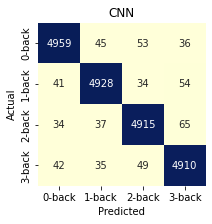

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
model.eval() 

# Setup test loss and test accuracy values
test_loss, test_acc = 0, 0
# Assuming your test_loader provides batches of data in the form (inputs, labels)
correct_predictions = 0
all_predictions = []
all_labels = []
target_names = np.array(['0-back', '1-back', '2-back','3-back'])

# Turn on inference context manager
with torch.inference_mode():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1)

        correct_predictions += (predictions == labels).sum().item()
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
'''
# Calculate accuracy
accuracy = correct_predictions / len(test_loader.dataset)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


# Calculate precision and recall
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
'''


print('Accuracy:', accuracy_score(all_labels, all_predictions))
print('F1 Score:',f1_score(all_labels, all_predictions, average='weighted'))
fpr, tpr, thresholds = metrics.roc_curve(all_labels, all_predictions, pos_label=2)
print('AUC:' ,metrics.auc(fpr, tpr))
print('precision: ', precision_score(all_labels, all_predictions, average='weighted'))
print('recall: ', recall_score(all_labels, all_predictions, average='weighted'))

cm = confusion_matrix(all_labels, all_predictions)
print(cm)

# Set the figure size
plt.figure(figsize=(3, 3))  # Set the width to 6 inches and height to 4 inches

sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=target_names, yticklabels=target_names, cbar=False, cmap='YlGnBu')
#pp_matrix_from_data(y_test.argmax(axis=1), y_pred)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN')

plt.savefig('CNN.svg', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

plt.close()
        

## folder 2

In [13]:
# general setupt and libraries

import torch
import torch.nn as nn
from torchvision import models, transforms
import torchvision
import matplotlib.pyplot as plt

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3090 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [16]:
class SimpleCNNLSTMModel(nn.Module):
    def __init__(self, input_channels, input_size, num_classes, hidden_size=64, num_layers=2):
        super(SimpleCNNLSTMModel, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        cnn_output_size = 32 * (input_size // 4)

        # LSTM layers
        self.lstm1 = nn.LSTM(input_size=cnn_output_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x.permute(0, 2, 1))  # Adjust the input for Conv1d
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)

        # Reshape for LSTM input
        x = x.view(x.size(0), 1, -1)

        # First LSTM layer
        x, _ = self.lstm1(x)

        # Second LSTM layer
        x, _ = self.lstm2(x)

        # Only take the output from the final time step
        x = x[:, -1, :]

        # Fully connected layers
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

# Assuming input_size = 150, input_channels = 8, and num_classes = 4
input_channels = 8
input_size = 150
num_classes = 4

# Instantiate the SimpleCNNLSTMModel
model = SimpleCNNLSTMModel(input_channels=input_channels, input_size=input_size, num_classes=num_classes).to(device)
model

SimpleCNNLSTMModel(
  (conv1): Conv1d(8, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu2): ReLU()
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lstm1): LSTM(1184, 64, num_layers=2, batch_first=True)
  (lstm2): LSTM(64, 64, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [17]:
checkpoint = torch.load("/media/mehshan/common/codes/python_files/tufts_codes_work/syscon2024/results_final/folder2/saved_model/best_accuracy_save/epoch_759_tacc0.98_tloss_0.11.pth")
model.load_state_dict(checkpoint["model_state_dict"])

# to avoid errors model and data sshould be in same device
model.to(device)

SimpleCNNLSTMModel(
  (conv1): Conv1d(8, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu2): ReLU()
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lstm1): LSTM(1184, 64, num_layers=2, batch_first=True)
  (lstm2): LSTM(64, 64, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

Accuracy: 0.9789988634679053
F1 Score: 0.9789882217056094
AUC: 0.6704326915116803
precision:  0.9790370839021239
recall:  0.9789988634679053
[[5020   41   10   22]
 [  44 4936   49   28]
 [  10   24 4982   35]
 [  45   34   83 4874]]


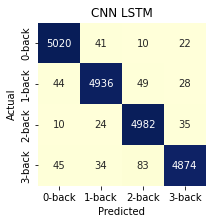

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
model.eval() 

# Setup test loss and test accuracy values
test_loss, test_acc = 0, 0
# Assuming your test_loader provides batches of data in the form (inputs, labels)
correct_predictions = 0
all_predictions = []
all_labels = []
target_names = np.array(['0-back', '1-back', '2-back','3-back'])

# Turn on inference context manager
with torch.inference_mode():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1)

        correct_predictions += (predictions == labels).sum().item()
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
'''
# Calculate accuracy
accuracy = correct_predictions / len(test_loader.dataset)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


# Calculate precision and recall
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
'''


print('Accuracy:', accuracy_score(all_labels, all_predictions))
print('F1 Score:',f1_score(all_labels, all_predictions, average='weighted'))
fpr, tpr, thresholds = metrics.roc_curve(all_labels, all_predictions, pos_label=2)
print('AUC:' ,metrics.auc(fpr, tpr))
print('precision: ', precision_score(all_labels, all_predictions, average='weighted'))
print('recall: ', recall_score(all_labels, all_predictions, average='weighted'))

cm = confusion_matrix(all_labels, all_predictions)
print(cm)

# Set the figure size
plt.figure(figsize=(3, 3))  # Set the width to 6 inches and height to 4 inches

sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=target_names, yticklabels=target_names, cbar=False, cmap='YlGnBu')
#pp_matrix_from_data(y_test.argmax(axis=1), y_pred)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN LSTM')

plt.savefig('CNN_LSTM.svg', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

plt.close()
        

Accuracy: 0.6972871473044424
F1 Score: 0.6972665207943333
AUC: 0.6105084062488861
precision:  0.6972893430301347
recall:  0.6972871473044424
[[3658  501  457  477]
 [ 562 3452  543  500]
 [ 449  523 3484  595]
 [ 444  486  589 3517]]


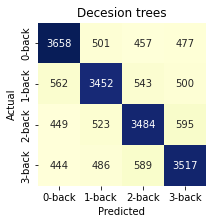

In [5]:
import numpy as np
import pickle
#sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, svm, tree
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


# variable pre-processed in featues_save.py
with open('input_features_labels.pkl', 'rb') as f:
    data,labels = pickle.load(f)


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reshape the data to fit into the classifier
reshaped_data = data.reshape(101184, -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reshaped_data, labels, test_size=0.2, random_state=10)
target_names = np.array(['0-back', '1-back', '2-back','3-back'])

# Using classification model, Model prediction
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
#Model prediction
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:',f1_score( y_test, y_pred, average='weighted'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
print('AUC:' ,metrics.auc(fpr, tpr))
print('precision: ', precision_score(y_test, y_pred, average='weighted'))
print('recall: ', recall_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
print(cm)
# Set the figure size
plt.figure(figsize=(3, 3))  # Set the width to 6 inches and height to 4 inches

sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=target_names, yticklabels=target_names, cbar=False, cmap='YlGnBu')
#pp_matrix_from_data(y_test.argmax(axis=1), y_pred)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decesion trees')

plt.savefig('decesion_trees.svg', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

plt.close()

Accuracy: 0.3373523743637891
F1 Score: 0.28595469274385227
AUC: 0.571262331384373
precision:  0.36713124183191304
recall:  0.3373523743637891
[[1606  349 2819  319]
 [1294  421 3016  326]
 [ 462  201 4088  300]
 [ 713  281 3330  712]]


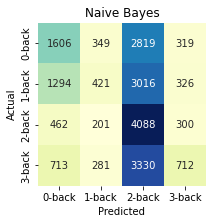

In [1]:
import numpy as np
import pickle
#sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, svm, tree
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB


# variable pre-processed in featues_save.py
with open('input_features_labels.pkl', 'rb') as f:
    data,labels = pickle.load(f)


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reshape the data to fit into the classifier
reshaped_data = data.reshape(101184, -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reshaped_data, labels, test_size=0.2, random_state=10)
target_names = np.array(['0-back', '1-back', '2-back','3-back'])

# Using classification model, Model prediction
clf = GaussianNB()
clf.fit(X_train, y_train)
#Model prediction
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:',f1_score( y_test, y_pred, average='weighted'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
print('AUC:' ,metrics.auc(fpr, tpr))
print('precision: ', precision_score(y_test, y_pred, average='weighted'))
print('recall: ', recall_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
print(cm)
# Set the figure size
plt.figure(figsize=(3, 3))  # Set the width to 6 inches and height to 4 inches

sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=target_names, yticklabels=target_names, cbar=False, cmap='YlGnBu')
#pp_matrix_from_data(y_test.argmax(axis=1), y_pred)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes')

plt.savefig('naive_bayes.svg', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

plt.close()

Accuracy: 0.3325591737905816
F1 Score: 0.3207667893662857
AUC: 0.5803908913489102
precision:  0.331682782319297
recall:  0.3325591737905816
[[1298 1797 1461  537]
 [ 930 2115 1320  692]
 [ 677 1104 2443  827]
 [ 668 1238 2256  874]]


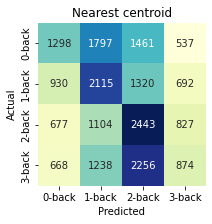

In [1]:
import numpy as np
import pickle
#sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, svm, tree
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB


# variable pre-processed in featues_save.py
with open('input_features_labels.pkl', 'rb') as f:
    data,labels = pickle.load(f)


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reshape the data to fit into the classifier
reshaped_data = data.reshape(101184, -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reshaped_data, labels, test_size=0.2, random_state=10)
target_names = np.array(['0-back', '1-back', '2-back','3-back'])

# Using classification model, Model prediction
clf = NearestCentroid()
clf.fit(X_train, y_train)
#Model prediction
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:',f1_score( y_test, y_pred, average='weighted'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
print('AUC:' ,metrics.auc(fpr, tpr))
print('precision: ', precision_score(y_test, y_pred, average='weighted'))
print('recall: ', recall_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
print(cm)
# Set the figure size
plt.figure(figsize=(3, 3))  # Set the width to 6 inches and height to 4 inches

sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=target_names, yticklabels=target_names, cbar=False, cmap='YlGnBu')
#pp_matrix_from_data(y_test.argmax(axis=1), y_pred)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Nearest centroid')

plt.savefig('nearest_centroid.svg', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()
plt.close()